<a href="https://colab.research.google.com/github/mjkimcs/portfolio/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EB%B6%84%EB%A5%98/21l_%EA%B8%88%EC%9C%B5%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%86%8C%EB%93%9D%EA%B5%AC%EA%B0%84%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 01. 금융 데이터로 소득구간 예측하기

## 실습 가이드
1. 데이터를 다운로드하여 Colab에 불러옵니다.
2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
3. 코드는 위에서부터 아래로 순서대로 실행합니다.
4. 전체 문제 구성은 좌측 첫 번째 아이콘을 통해 확인할 수 있습니다.

## Step 0. 금융 데이터 소개 및 예측 모델 개요 
고객 소득구간 예측문제는 금융 데이터 분석에서 가장 중요한 문제 중 하나라고 할 수 있습니다.
분석에 들어가기 앞서 2가지 사항을 짚어보도록 하겠습니다.

### <b> 금융 데이터의 속성</b>
금융 데이터는 주로 아래의 특성을 띄게 됩니다.
- 1) <b>이종(heterogeneous) 데이터의 결합</b>: 데이터의 원천·형태·스케일 등이 서로 다른 성격을 가짐
- 2) <b>분포의 편향성(skewedness)</b>: 예측값과 정답이 멀리 떨어져 있으면 학습 결과의 편향(bias)이 높을 수 있음
- 3) <b>분류 레이블의 불명확성</b>: 소득구간·신용등급·상품종류 등은 비즈니스 로직을 포함하므로 분류가 임의적 → 분석가의 해석력이 중요
- 4) <b>변수의 다중공선성(multicollinearity)</b>: 변수간 상호의존이나 상관관계가 강하게 나타날 수 있음
- 5) <b>변수의 비선형성</b>: 변수의 영향력이 선형적이지 않을 수 있음, e.g.) 나이가 소득에 미치는 영향은?
- 그 외 현실적인 규제·수집·저장 등의 한계 때문에 데이터가 불완전(missing, truncated, censored)할 수 있음

### <b>다중분류와 소득구간 예측</b>
예측할 클래스(레이블 혹은 레벨이라고도 합니다)가 3개 이상인 경우를 다중분류 문제라고 합니다. 단순하게는 Multiclass classification, 회귀방법론을 쓴다면 Multinomial logistic regression 이라는 명칭으로 불립니다. 클래스간 위계관계(포함관계)는 동등하다고 가정하겠습니다. 

소득구간 예측은 전형적인 다중분류 문제입니다. 분석에 앞서 다음과 같은 사항을 생각해 봅시다.
- 1) <b> 클래스간 구분이 명확하지 않을 경우</b>: 소득구간 구분은 어떻게 지어야 하며, 클래스는 몇 개로 결정해야 할까요? 
- 2) <b>클래스간 구분에 순서가 있을 경우</b>: 정확하게 말하자면 각 소득구간은 순서가 있는(ordinal) 클래스로 보아야 할 것입니다.
- 3) <b>특정 클래스에 해당하는 값이 부족할 경우</b>: 고소득 구간 고객 수와 중소득 구간 고객의 수가 현저히 차이가 날 때 어떻게 해결할까요?

다중분류 문제는 이진분류 대비 아래와 같은 추가 고려사항이 있습니다.
- 1) <b>모델 구현할 때 주의사항</b>: 변수의 원-핫-인코딩 처리, 목적함수의 결정 등
- 2) <b>결과 해석할 때 주의사항</b>: 정확도(Accuracy), F1 스코어, Confusion Matrix 등
- 실제 분석에서 자세히 다루도록 하겠습니다.

### <b>학습목표</b>
- 1) 이진분류·다중분류 모델의 이해
- 2) 선형 기반·트리 기반 분류모델의 이해
- 3) 변수 처리 방법에 대한 이해
- 4) 분류모델 결과를 해석하는 방법 습득
- 5) 평가결과를 바탕으로 모델을 개선하는 방법 습득

- 출제자: 최민정 강사

## Step 1. 예측할 데이터 불러오기

### 데이터 소개
 
- 이번 주제는 US Census Bureau에서 수집하고 UCI에서 배포한 US Adult Income 데이터셋에 강사가 자체 제작한 모의 변수를 추가·수정한 데이터를 사용합니다.
- 첫번째로 사용할 데이터는 US Adult Income 데이터셋이며 컬럼은 아래와 같습니다.
 
 
- `age` : 나이
- `workclass`: 직업구분
- `education`: 교육수준
- `education.num`: 교육수준(numerically coded)
- `marital.status`: 혼인상태
- `occupation` : 직업
- `relationship`: 가족관계
- `race`: 인종
- `sex`: 성별
- `capital.gain`: 자본이득
- `capital.loss`: 자본손실
- `hours.per.week`: 주당 근로시간
- `income` : 소득 구분
 
원 데이터 출처: https://archive.ics.uci.edu/ml/datasets/adult

### 문제 01. 데이터 불러오기

In [1]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [178]:
df = pd.read_csv("./train_numeric.csv")
df.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,40,6,13,2,3,5,4,0,0,0,20,38,0
1,39,1,9,2,6,0,4,1,0,0,38,38,1
2,42,3,10,4,3,1,4,0,0,0,40,38,0
3,27,1,9,4,4,3,4,1,0,0,40,38,0
4,38,0,14,2,3,0,4,1,0,0,40,38,1


In [73]:
df.shape

(32561, 13)

In [74]:
32561*0.8

26048.800000000003

In [108]:
import optuna.integration.lightgbm as lgb
from lightgbm import LGBMClassifier ## 이것이 좀 다름
from matplotlib import pyplot as plt
from matplotlib import rcParams
import numpy as np
from pathlib import Path
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold, train_test_split
import seaborn as sns
import warnings

In [107]:
pip install optuna

     |████████████████████████████████| 302 kB 5.1 MB/s 
     |████████████████████████████████| 80 kB 7.2 MB/s 
     |████████████████████████████████| 164 kB 52.1 MB/s 
     |████████████████████████████████| 75 kB 2.9 MB/s 
     |████████████████████████████████| 49 kB 4.9 MB/s 
     |████████████████████████████████| 111 kB 43.0 MB/s 
     |████████████████████████████████| 141 kB 55.9 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=47b2c3e54d5a5a7f7e17a76dc9a90ec9b852436277812a0c6c9afd2ba983f492
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [154]:
seed = 0
params = {
    "objective": "binary",
    "metric": "binary_logloss",
    "n_estimators": 1000,
    "subsample_freq": 1,
    "lambda_l1": 0.,
    "lambda_l2": 0.,
    "random_state": seed,
    "n_jobs": -1,
}

In [155]:
dtrain = lgb.Dataset(X_trn, label=y_trn)
dval = lgb.Dataset(X_val, label=y_val)

model = lgb.train(params, dtrain, valid_sets=[dtrain, dval], 
                  verbose_eval=100, early_stopping_rounds=10)

preds = model.predict(X_val, num_iteration=model.best_iteration)
prediction = (preds >= 0.5).astype('int') # thresholds가 0.5인 경우
accuracy = accuracy_score(y_val, prediction)

params = model.params
print("Best params:", params)
print("  Accuracy = {}".format(accuracy))
print("  Params: ")
for key, value in params.items():
    print("    {}: {}".format(key, value))

[I 2021-08-19 02:04:28,598] A new study created in memory with name: no-name-87e1cbd7-241d-42be-8c67-dc66e946ea31




  0%|          | 0/7 [00:00<?, ?it/s]



feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 10 rounds.






feature_fraction, val_score: 0.268844:   0%|          | 0/7 [00:00<?, ?it/s]



feature_fraction, val_score: 0.268844:  14%|#4        | 1/7 [00:00<00:04,  1.28it/s][I 2021-08-19 02:04:29,395] Trial 0 finished with value: 0.2688444667389393 and parameters: {'feature_fraction': 0.8}. Best is trial 0 with value: 0.2688444667389393.




feature_fraction, val_score: 0.268844:  14%|#4        | 1/7 [00:00<00:04,  1.28it/s]

[100]	valid_0's binary_logloss: 0.248262	valid_1's binary_logloss: 0.269054
Early stopping, best iteration is:
[110]	valid_0's binary_logloss: 0.245214	valid_1's binary_logloss: 0.268844
Training until validation scores don't improve for 10 rounds.






feature_fraction, val_score: 0.268844:  14%|#4        | 1/7 [00:01<00:04,  1.28it/s]



feature_fraction, val_score: 0.268844:  29%|##8       | 2/7 [00:01<00:03,  1.43it/s][I 2021-08-19 02:04:30,042] Trial 1 finished with value: 0.2698225368142621 and parameters: {'feature_fraction': 1.0}. Best is trial 0 with value: 0.2688444667389393.




feature_fraction, val_score: 0.268844:  29%|##8       | 2/7 [00:01<00:03,  1.43it/s]

Early stopping, best iteration is:
[81]	valid_0's binary_logloss: 0.252042	valid_1's binary_logloss: 0.269823
Training until validation scores don't improve for 10 rounds.
[100]	valid_0's binary_logloss: 0.258385	valid_1's binary_logloss: 0.268916






feature_fraction, val_score: 0.266637:  29%|##8       | 2/7 [00:02<00:03,  1.43it/s]



feature_fraction, val_score: 0.266637:  43%|####2     | 3/7 [00:02<00:03,  1.22it/s][I 2021-08-19 02:04:31,013] Trial 2 finished with value: 0.26663650270078104 and parameters: {'feature_fraction': 0.4}. Best is trial 2 with value: 0.26663650270078104.




feature_fraction, val_score: 0.266637:  43%|####2     | 3/7 [00:02<00:03,  1.22it/s]

Early stopping, best iteration is:
[155]	valid_0's binary_logloss: 0.246967	valid_1's binary_logloss: 0.266637
Training until validation scores don't improve for 10 rounds.






feature_fraction, val_score: 0.266637:  43%|####2     | 3/7 [00:03<00:03,  1.22it/s]



feature_fraction, val_score: 0.266637:  57%|#####7    | 4/7 [00:03<00:02,  1.34it/s][I 2021-08-19 02:04:31,639] Trial 3 finished with value: 0.2693939825119273 and parameters: {'feature_fraction': 0.8999999999999999}. Best is trial 2 with value: 0.26663650270078104.




feature_fraction, val_score: 0.266637:  57%|#####7    | 4/7 [00:03<00:02,  1.34it/s]

Early stopping, best iteration is:
[76]	valid_0's binary_logloss: 0.254753	valid_1's binary_logloss: 0.269394
Training until validation scores don't improve for 10 rounds.






feature_fraction, val_score: 0.266637:  57%|#####7    | 4/7 [00:03<00:02,  1.34it/s]



feature_fraction, val_score: 0.266637:  71%|#######1  | 5/7 [00:03<00:01,  1.35it/s][I 2021-08-19 02:04:32,371] Trial 4 finished with value: 0.26935741929646145 and parameters: {'feature_fraction': 0.7}. Best is trial 2 with value: 0.26663650270078104.




feature_fraction, val_score: 0.266637:  71%|#######1  | 5/7 [00:03<00:01,  1.35it/s]

[100]	valid_0's binary_logloss: 0.249475	valid_1's binary_logloss: 0.269557
Early stopping, best iteration is:
[93]	valid_0's binary_logloss: 0.251284	valid_1's binary_logloss: 0.269357
Training until validation scores don't improve for 10 rounds.






feature_fraction, val_score: 0.266637:  71%|#######1  | 5/7 [00:04<00:01,  1.35it/s]



feature_fraction, val_score: 0.266637:  86%|########5 | 6/7 [00:04<00:00,  1.36it/s][I 2021-08-19 02:04:33,097] Trial 5 finished with value: 0.26752787166238406 and parameters: {'feature_fraction': 0.6}. Best is trial 2 with value: 0.26663650270078104.




feature_fraction, val_score: 0.266637:  86%|########5 | 6/7 [00:04<00:00,  1.36it/s]

[100]	valid_0's binary_logloss: 0.250054	valid_1's binary_logloss: 0.267541
Early stopping, best iteration is:
[99]	valid_0's binary_logloss: 0.250338	valid_1's binary_logloss: 0.267528
Training until validation scores don't improve for 10 rounds.






feature_fraction, val_score: 0.266637:  86%|########5 | 6/7 [00:05<00:00,  1.36it/s]



feature_fraction, val_score: 0.266637: 100%|##########| 7/7 [00:05<00:00,  1.30it/s][I 2021-08-19 02:04:33,929] Trial 6 finished with value: 0.26820033054010195 and parameters: {'feature_fraction': 0.5}. Best is trial 2 with value: 0.26663650270078104.


[100]	valid_0's binary_logloss: 0.251718	valid_1's binary_logloss: 0.269104
Early stopping, best iteration is:
[123]	valid_0's binary_logloss: 0.245514	valid_1's binary_logloss: 0.2682


feature_fraction, val_score: 0.266637: 100%|##########| 7/7 [00:05<00:00,  1.32it/s]




  0%|          | 0/20 [00:00<?, ?it/s]



num_leaves, val_score: 0.266637:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 10 rounds.






num_leaves, val_score: 0.266637:   0%|          | 0/20 [00:00<?, ?it/s]



num_leaves, val_score: 0.266637:   5%|5         | 1/20 [00:00<00:15,  1.20it/s][I 2021-08-19 02:04:34,786] Trial 7 finished with value: 0.2744588766457325 and parameters: {'num_leaves': 158}. Best is trial 7 with value: 0.2744588766457325.




num_leaves, val_score: 0.266637:   5%|5         | 1/20 [00:00<00:15,  1.20it/s]

Early stopping, best iteration is:
[72]	valid_0's binary_logloss: 0.241243	valid_1's binary_logloss: 0.274459
Training until validation scores don't improve for 10 rounds.






num_leaves, val_score: 0.266637:   5%|5         | 1/20 [00:01<00:15,  1.20it/s]



num_leaves, val_score: 0.266637:  10%|#         | 2/20 [00:01<00:15,  1.13it/s][I 2021-08-19 02:04:35,701] Trial 8 finished with value: 0.2698362774699874 and parameters: {'num_leaves': 89}. Best is trial 8 with value: 0.2698362774699874.




num_leaves, val_score: 0.266637:  10%|#         | 2/20 [00:01<00:15,  1.13it/s]

[100]	valid_0's binary_logloss: 0.236225	valid_1's binary_logloss: 0.269836
Early stopping, best iteration is:
[100]	valid_0's binary_logloss: 0.236225	valid_1's binary_logloss: 0.269836
Training until validation scores don't improve for 10 rounds.






num_leaves, val_score: 0.266637:  10%|#         | 2/20 [00:02<00:15,  1.13it/s]



num_leaves, val_score: 0.266637:  15%|#5        | 3/20 [00:02<00:14,  1.19it/s][I 2021-08-19 02:04:36,488] Trial 9 finished with value: 0.2736067637986303 and parameters: {'num_leaves': 126}. Best is trial 8 with value: 0.2698362774699874.




num_leaves, val_score: 0.266637:  15%|#5        | 3/20 [00:02<00:14,  1.19it/s]

Early stopping, best iteration is:
[72]	valid_0's binary_logloss: 0.244539	valid_1's binary_logloss: 0.273607
Training until validation scores don't improve for 10 rounds.
[100]	valid_0's binary_logloss: 0.268069	valid_1's binary_logloss: 0.269976






num_leaves, val_score: 0.266637:  15%|#5        | 3/20 [00:03<00:14,  1.19it/s]



num_leaves, val_score: 0.266637:  20%|##        | 4/20 [00:03<00:13,  1.18it/s][I 2021-08-19 02:04:37,339] Trial 10 finished with value: 0.2669992408654684 and parameters: {'num_leaves': 18}. Best is trial 10 with value: 0.2669992408654684.




num_leaves, val_score: 0.266637:  20%|##        | 4/20 [00:03<00:13,  1.18it/s]

Early stopping, best iteration is:
[156]	valid_0's binary_logloss: 0.258075	valid_1's binary_logloss: 0.266999
Training until validation scores don't improve for 10 rounds.
[100]	valid_0's binary_logloss: 0.268069	valid_1's binary_logloss: 0.269976






num_leaves, val_score: 0.266637:  20%|##        | 4/20 [00:04<00:13,  1.18it/s]



num_leaves, val_score: 0.266637:  25%|##5       | 5/20 [00:04<00:12,  1.16it/s][I 2021-08-19 02:04:38,224] Trial 11 finished with value: 0.2669992408654684 and parameters: {'num_leaves': 18}. Best is trial 10 with value: 0.2669992408654684.




num_leaves, val_score: 0.266637:  25%|##5       | 5/20 [00:04<00:12,  1.16it/s]

Early stopping, best iteration is:
[156]	valid_0's binary_logloss: 0.258075	valid_1's binary_logloss: 0.266999
Training until validation scores don't improve for 10 rounds.






num_leaves, val_score: 0.266637:  25%|##5       | 5/20 [00:05<00:12,  1.16it/s]



num_leaves, val_score: 0.266637:  30%|###       | 6/20 [00:05<00:12,  1.12it/s][I 2021-08-19 02:04:39,171] Trial 12 finished with value: 0.2704490572179857 and parameters: {'num_leaves': 96}. Best is trial 10 with value: 0.2669992408654684.




num_leaves, val_score: 0.266637:  30%|###       | 6/20 [00:05<00:12,  1.12it/s]

[100]	valid_0's binary_logloss: 0.234726	valid_1's binary_logloss: 0.270449
Early stopping, best iteration is:
[100]	valid_0's binary_logloss: 0.234726	valid_1's binary_logloss: 0.270449
Training until validation scores don't improve for 10 rounds.






num_leaves, val_score: 0.266637:  30%|###       | 6/20 [00:06<00:12,  1.12it/s]



num_leaves, val_score: 0.266637:  35%|###5      | 7/20 [00:06<00:11,  1.15it/s][I 2021-08-19 02:04:40,005] Trial 13 finished with value: 0.2744043886264101 and parameters: {'num_leaves': 145}. Best is trial 10 with value: 0.2669992408654684.




num_leaves, val_score: 0.266637:  35%|###5      | 7/20 [00:06<00:11,  1.15it/s]

Early stopping, best iteration is:
[72]	valid_0's binary_logloss: 0.242435	valid_1's binary_logloss: 0.274404
Training until validation scores don't improve for 10 rounds.






num_leaves, val_score: 0.266637:  35%|###5      | 7/20 [00:06<00:11,  1.15it/s]



num_leaves, val_score: 0.266637:  40%|####      | 8/20 [00:06<00:10,  1.19it/s][I 2021-08-19 02:04:40,775] Trial 14 finished with value: 0.2739639108393212 and parameters: {'num_leaves': 135}. Best is trial 10 with value: 0.2669992408654684.




num_leaves, val_score: 0.266637:  40%|####      | 8/20 [00:06<00:10,  1.19it/s]

Early stopping, best iteration is:
[72]	valid_0's binary_logloss: 0.243483	valid_1's binary_logloss: 0.273964
Training until validation scores don't improve for 10 rounds.






num_leaves, val_score: 0.266637:  40%|####      | 8/20 [00:07<00:10,  1.19it/s]



num_leaves, val_score: 0.266637:  45%|####5     | 9/20 [00:07<00:09,  1.14it/s][I 2021-08-19 02:04:41,731] Trial 15 finished with value: 0.2712380853360849 and parameters: {'num_leaves': 122}. Best is trial 10 with value: 0.2669992408654684.




num_leaves, val_score: 0.266637:  45%|####5     | 9/20 [00:07<00:09,  1.14it/s]

[100]	valid_0's binary_logloss: 0.229647	valid_1's binary_logloss: 0.271331
Early stopping, best iteration is:
[96]	valid_0's binary_logloss: 0.23168	valid_1's binary_logloss: 0.271238
Training until validation scores don't improve for 10 rounds.






num_leaves, val_score: 0.266637:  45%|####5     | 9/20 [00:08<00:09,  1.14it/s]



num_leaves, val_score: 0.266637:  50%|#####     | 10/20 [00:08<00:09,  1.10it/s][I 2021-08-19 02:04:42,711] Trial 16 finished with value: 0.2760538794212533 and parameters: {'num_leaves': 229}. Best is trial 10 with value: 0.2669992408654684.




num_leaves, val_score: 0.266637:  50%|#####     | 10/20 [00:08<00:09,  1.10it/s]

Early stopping, best iteration is:
[72]	valid_0's binary_logloss: 0.235687	valid_1's binary_logloss: 0.276054
Training until validation scores don't improve for 10 rounds.
[100]	valid_0's binary_logloss: 0.261293	valid_1's binary_logloss: 0.268901






num_leaves, val_score: 0.266637:  50%|#####     | 10/20 [00:09<00:09,  1.10it/s]



num_leaves, val_score: 0.266637:  55%|#####5    | 11/20 [00:09<00:08,  1.12it/s][I 2021-08-19 02:04:43,580] Trial 17 finished with value: 0.2667450614035122 and parameters: {'num_leaves': 27}. Best is trial 17 with value: 0.2667450614035122.




num_leaves, val_score: 0.266637:  55%|#####5    | 11/20 [00:09<00:08,  1.12it/s]

Early stopping, best iteration is:
[140]	valid_0's binary_logloss: 0.252322	valid_1's binary_logloss: 0.266745
Training until validation scores don't improve for 10 rounds.
[100]	valid_0's binary_logloss: 0.283905	valid_1's binary_logloss: 0.276667
[200]	valid_0's binary_logloss: 0.27013	valid_1's binary_logloss: 0.26934
[300]	valid_0's binary_logloss: 0.263064	valid_1's binary_logloss: 0.267361
Early stopping, best iteration is:
[352]	valid_0's binary_logloss: 0.260001	valid_1's binary_logloss: 0.266635






num_leaves, val_score: 0.266635:  55%|#####5    | 11/20 [00:11<00:08,  1.12it/s]



num_leaves, val_score: 0.266635:  60%|######    | 12/20 [00:11<00:08,  1.04s/it][I 2021-08-19 02:04:44,959] Trial 18 finished with value: 0.266634615152314 and parameters: {'num_leaves': 8}. Best is trial 18 with value: 0.266634615152314.




num_leaves, val_score: 0.266635:  60%|######    | 12/20 [00:11<00:08,  1.04s/it]

Training until validation scores don't improve for 10 rounds.
[100]	valid_0's binary_logloss: 0.337393	valid_1's binary_logloss: 0.325967
[200]	valid_0's binary_logloss: 0.31674	valid_1's binary_logloss: 0.306257
[300]	valid_0's binary_logloss: 0.309375	valid_1's binary_logloss: 0.299087
[400]	valid_0's binary_logloss: 0.305017	valid_1's binary_logloss: 0.29479
[500]	valid_0's binary_logloss: 0.302049	valid_1's binary_logloss: 0.292001
[600]	valid_0's binary_logloss: 0.299874	valid_1's binary_logloss: 0.290213
[700]	valid_0's binary_logloss: 0.298166	valid_1's binary_logloss: 0.288806
[800]	valid_0's binary_logloss: 0.296753	valid_1's binary_logloss: 0.28784






num_leaves, val_score: 0.266635:  60%|######    | 12/20 [00:13<00:08,  1.04s/it]



num_leaves, val_score: 0.266635:  65%|######5   | 13/20 [00:13<00:10,  1.47s/it][I 2021-08-19 02:04:47,400] Trial 19 finished with value: 0.2865437989898913 and parameters: {'num_leaves': 2}. Best is trial 18 with value: 0.266634615152314.




num_leaves, val_score: 0.266635:  65%|######5   | 13/20 [00:13<00:10,  1.47s/it]

[900]	valid_0's binary_logloss: 0.295533	valid_1's binary_logloss: 0.286855
Early stopping, best iteration is:
[932]	valid_0's binary_logloss: 0.295183	valid_1's binary_logloss: 0.286544
Training until validation scores don't improve for 10 rounds.






num_leaves, val_score: 0.266635:  65%|######5   | 13/20 [00:14<00:10,  1.47s/it]



num_leaves, val_score: 0.266635:  70%|#######   | 14/20 [00:14<00:07,  1.28s/it][I 2021-08-19 02:04:48,231] Trial 20 finished with value: 0.26887222655403786 and parameters: {'num_leaves': 62}. Best is trial 18 with value: 0.266634615152314.




num_leaves, val_score: 0.266635:  70%|#######   | 14/20 [00:14<00:07,  1.28s/it]

[100]	valid_0's binary_logloss: 0.243931	valid_1's binary_logloss: 0.268872
Early stopping, best iteration is:
[100]	valid_0's binary_logloss: 0.243931	valid_1's binary_logloss: 0.268872
Training until validation scores don't improve for 10 rounds.
[100]	valid_0's binary_logloss: 0.248273	valid_1's binary_logloss: 0.268475
Early stopping, best iteration is:
[124]	valid_0's binary_logloss: 0.241541	valid_1's binary_logloss: 0.267562






num_leaves, val_score: 0.266635:  70%|#######   | 14/20 [00:15<00:07,  1.28s/it]



num_leaves, val_score: 0.266635:  75%|#######5  | 15/20 [00:15<00:05,  1.16s/it][I 2021-08-19 02:04:49,128] Trial 21 finished with value: 0.2675619672350419 and parameters: {'num_leaves': 51}. Best is trial 18 with value: 0.266634615152314.




num_leaves, val_score: 0.266635:  75%|#######5  | 15/20 [00:15<00:05,  1.16s/it]

Training until validation scores don't improve for 10 rounds.






num_leaves, val_score: 0.266635:  75%|#######5  | 15/20 [00:15<00:05,  1.16s/it]



num_leaves, val_score: 0.266635:  80%|########  | 16/20 [00:15<00:04,  1.05s/it][I 2021-08-19 02:04:49,939] Trial 22 finished with value: 0.26857442712079077 and parameters: {'num_leaves': 48}. Best is trial 18 with value: 0.266634615152314.




num_leaves, val_score: 0.266635:  80%|########  | 16/20 [00:16<00:04,  1.05s/it]

[100]	valid_0's binary_logloss: 0.249606	valid_1's binary_logloss: 0.268574
Early stopping, best iteration is:
[100]	valid_0's binary_logloss: 0.249606	valid_1's binary_logloss: 0.268574
Training until validation scores don't improve for 10 rounds.






num_leaves, val_score: 0.266635:  80%|########  | 16/20 [00:16<00:04,  1.05s/it]



num_leaves, val_score: 0.266635:  85%|########5 | 17/20 [00:16<00:03,  1.01s/it][I 2021-08-19 02:04:50,833] Trial 23 finished with value: 0.2755795241132483 and parameters: {'num_leaves': 196}. Best is trial 18 with value: 0.266634615152314.




num_leaves, val_score: 0.266635:  85%|########5 | 17/20 [00:16<00:03,  1.01s/it]

Early stopping, best iteration is:
[72]	valid_0's binary_logloss: 0.237713	valid_1's binary_logloss: 0.27558
Training until validation scores don't improve for 10 rounds.






num_leaves, val_score: 0.266635:  85%|########5 | 17/20 [00:17<00:03,  1.01s/it]



num_leaves, val_score: 0.266635:  90%|######### | 18/20 [00:17<00:01,  1.04it/s][I 2021-08-19 02:04:51,699] Trial 24 finished with value: 0.26932242348038526 and parameters: {'num_leaves': 78}. Best is trial 18 with value: 0.266634615152314.




num_leaves, val_score: 0.266635:  90%|######### | 18/20 [00:17<00:01,  1.04it/s]

[100]	valid_0's binary_logloss: 0.238767	valid_1's binary_logloss: 0.269322
Early stopping, best iteration is:
[100]	valid_0's binary_logloss: 0.238767	valid_1's binary_logloss: 0.269322
Training until validation scores don't improve for 10 rounds.






num_leaves, val_score: 0.266635:  90%|######### | 18/20 [00:18<00:01,  1.04it/s]



num_leaves, val_score: 0.266635:  95%|#########5| 19/20 [00:18<00:00,  1.09it/s]

[100]	valid_0's binary_logloss: 0.257793	valid_1's binary_logloss: 0.268725
Early stopping, best iteration is:
[125]	valid_0's binary_logloss: 0.251717	valid_1's binary_logloss: 0.267474


[I 2021-08-19 02:04:52,497] Trial 25 finished with value: 0.26747439932234435 and parameters: {'num_leaves': 32}. Best is trial 18 with value: 0.266634615152314.




num_leaves, val_score: 0.266635:  95%|#########5| 19/20 [00:18<00:00,  1.09it/s]

Training until validation scores don't improve for 10 rounds.
[100]	valid_0's binary_logloss: 0.337393	valid_1's binary_logloss: 0.325967
[200]	valid_0's binary_logloss: 0.31674	valid_1's binary_logloss: 0.306257
[300]	valid_0's binary_logloss: 0.309375	valid_1's binary_logloss: 0.299087
[400]	valid_0's binary_logloss: 0.305017	valid_1's binary_logloss: 0.29479
[500]	valid_0's binary_logloss: 0.302049	valid_1's binary_logloss: 0.292001
[600]	valid_0's binary_logloss: 0.299874	valid_1's binary_logloss: 0.290213
[700]	valid_0's binary_logloss: 0.298166	valid_1's binary_logloss: 0.288806
[800]	valid_0's binary_logloss: 0.296753	valid_1's binary_logloss: 0.28784






num_leaves, val_score: 0.266635:  95%|#########5| 19/20 [00:21<00:00,  1.09it/s]



num_leaves, val_score: 0.266635: 100%|##########| 20/20 [00:21<00:00,  1.05s/it]


[900]	valid_0's binary_logloss: 0.295533	valid_1's binary_logloss: 0.286855
Early stopping, best iteration is:
[932]	valid_0's binary_logloss: 0.295183	valid_1's binary_logloss: 0.286544






  0%|          | 0/10 [00:00<?, ?it/s]



bagging, val_score: 0.266635:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 10 rounds.
[100]	valid_0's binary_logloss: 0.283663	valid_1's binary_logloss: 0.277101






bagging, val_score: 0.266635:   0%|          | 0/10 [00:01<?, ?it/s]



bagging, val_score: 0.266635:  10%|#         | 1/10 [00:01<00:10,  1.13s/it][I 2021-08-19 02:04:56,143] Trial 27 finished with value: 0.2695266092304158 and parameters: {'bagging_fraction': 0.7929547914698563, 'bagging_freq': 5}. Best is trial 27 with value: 0.2695266092304158.




bagging, val_score: 0.266635:  10%|#         | 1/10 [00:01<00:10,  1.13s/it]

[200]	valid_0's binary_logloss: 0.269429	valid_1's binary_logloss: 0.269925
Early stopping, best iteration is:
[218]	valid_0's binary_logloss: 0.267841	valid_1's binary_logloss: 0.269527
Training until validation scores don't improve for 10 rounds.
[100]	valid_0's binary_logloss: 0.283541	valid_1's binary_logloss: 0.277465






bagging, val_score: 0.266635:  10%|#         | 1/10 [00:02<00:10,  1.13s/it]



bagging, val_score: 0.266635:  20%|##        | 2/10 [00:02<00:08,  1.04s/it][I 2021-08-19 02:04:57,122] Trial 28 finished with value: 0.27102317019343874 and parameters: {'bagging_fraction': 0.682267655588322, 'bagging_freq': 2}. Best is trial 27 with value: 0.2695266092304158.




bagging, val_score: 0.266635:  20%|##        | 2/10 [00:02<00:08,  1.04s/it]

Early stopping, best iteration is:
[179]	valid_0's binary_logloss: 0.271849	valid_1's binary_logloss: 0.271023
Training until validation scores don't improve for 10 rounds.
[100]	valid_0's binary_logloss: 0.283542	valid_1's binary_logloss: 0.277536






bagging, val_score: 0.266635:  20%|##        | 2/10 [00:02<00:08,  1.04s/it]



bagging, val_score: 0.266635:  30%|###       | 3/10 [00:02<00:06,  1.09it/s][I 2021-08-19 02:04:57,884] Trial 29 finished with value: 0.27237430180790667 and parameters: {'bagging_fraction': 0.5589714417635894, 'bagging_freq': 5}. Best is trial 27 with value: 0.2695266092304158.




bagging, val_score: 0.266635:  30%|###       | 3/10 [00:02<00:06,  1.09it/s]

Early stopping, best iteration is:
[140]	valid_0's binary_logloss: 0.27623	valid_1's binary_logloss: 0.272374
Training until validation scores don't improve for 10 rounds.


[100]	valid_0's binary_logloss: 0.283486	valid_1's binary_logloss: 0.276736
Early stopping, best iteration is:
[137]	valid_0's binary_logloss: 0.276152	valid_1's binary_logloss: 0.27254


bagging, val_score: 0.266635:  30%|###       | 3/10 [00:03<00:06,  1.09it/s]



bagging, val_score: 0.266635:  40%|####      | 4/10 [00:03<00:05,  1.17it/s][I 2021-08-19 02:04:58,649] Trial 30 finished with value: 0.2725396666482267 and parameters: {'bagging_fraction': 0.7440233151979977, 'bagging_freq': 7}. Best is trial 27 with value: 0.2695266092304158.




bagging, val_score: 0.266635:  40%|####      | 4/10 [00:03<00:05,  1.17it/s]

Training until validation scores don't improve for 10 rounds.
[100]	valid_0's binary_logloss: 0.283994	valid_1's binary_logloss: 0.278246






bagging, val_score: 0.266635:  40%|####      | 4/10 [00:04<00:05,  1.17it/s]



bagging, val_score: 0.266635:  50%|#####     | 5/10 [00:04<00:04,  1.21it/s][I 2021-08-19 02:04:59,418] Trial 31 finished with value: 0.274383377698521 and parameters: {'bagging_fraction': 0.588931940237133, 'bagging_freq': 7}. Best is trial 27 with value: 0.2695266092304158.




bagging, val_score: 0.266635:  50%|#####     | 5/10 [00:04<00:04,  1.21it/s]

Early stopping, best iteration is:
[140]	valid_0's binary_logloss: 0.276593	valid_1's binary_logloss: 0.274383
Training until validation scores don't improve for 10 rounds.
[100]	valid_0's binary_logloss: 0.283745	valid_1's binary_logloss: 0.277242






bagging, val_score: 0.266635:  50%|#####     | 5/10 [00:05<00:04,  1.21it/s]



bagging, val_score: 0.266635:  60%|######    | 6/10 [00:05<00:03,  1.17it/s][I 2021-08-19 02:05:00,329] Trial 32 finished with value: 0.2719910410026615 and parameters: {'bagging_fraction': 0.5284485344696781, 'bagging_freq': 6}. Best is trial 27 with value: 0.2695266092304158.




bagging, val_score: 0.266635:  60%|######    | 6/10 [00:05<00:03,  1.17it/s]

Early stopping, best iteration is:
[180]	valid_0's binary_logloss: 0.272231	valid_1's binary_logloss: 0.271991
Training until validation scores don't improve for 10 rounds.
[100]	valid_0's binary_logloss: 0.283412	valid_1's binary_logloss: 0.277064






bagging, val_score: 0.266635:  60%|######    | 6/10 [00:06<00:03,  1.17it/s]



bagging, val_score: 0.266635:  70%|#######   | 7/10 [00:06<00:02,  1.17it/s][I 2021-08-19 02:05:01,179] Trial 33 finished with value: 0.2710988215220864 and parameters: {'bagging_fraction': 0.8136404051346515, 'bagging_freq': 7}. Best is trial 27 with value: 0.2695266092304158.




bagging, val_score: 0.266635:  70%|#######   | 7/10 [00:06<00:02,  1.17it/s]

Early stopping, best iteration is:
[160]	valid_0's binary_logloss: 0.273327	valid_1's binary_logloss: 0.271099
Training until validation scores don't improve for 10 rounds.
[100]	valid_0's binary_logloss: 0.283567	valid_1's binary_logloss: 0.276957






bagging, val_score: 0.266635:  70%|#######   | 7/10 [00:06<00:02,  1.17it/s]



bagging, val_score: 0.266635:  80%|########  | 8/10 [00:06<00:01,  1.19it/s][I 2021-08-19 02:05:01,983] Trial 34 finished with value: 0.27239140044830423 and parameters: {'bagging_fraction': 0.833478724122354, 'bagging_freq': 4}. Best is trial 27 with value: 0.2695266092304158.




bagging, val_score: 0.266635:  80%|########  | 8/10 [00:06<00:01,  1.19it/s]

Early stopping, best iteration is:
[140]	valid_0's binary_logloss: 0.276254	valid_1's binary_logloss: 0.272391
Training until validation scores don't improve for 10 rounds.
[100]	valid_0's binary_logloss: 0.284009	valid_1's binary_logloss: 0.276917
Early stopping, best iteration is:
[139]	valid_0's binary_logloss: 0.276436	valid_1's binary_logloss: 0.271998






bagging, val_score: 0.266635:  80%|########  | 8/10 [00:07<00:01,  1.19it/s]



bagging, val_score: 0.266635:  90%|######### | 9/10 [00:07<00:00,  1.22it/s][I 2021-08-19 02:05:02,764] Trial 35 finished with value: 0.27199771730406586 and parameters: {'bagging_fraction': 0.8190451537758479, 'bagging_freq': 5}. Best is trial 27 with value: 0.2695266092304158.




bagging, val_score: 0.266635:  90%|######### | 9/10 [00:07<00:00,  1.22it/s]

Training until validation scores don't improve for 10 rounds.
[100]	valid_0's binary_logloss: 0.283885	valid_1's binary_logloss: 0.277701






bagging, val_score: 0.266635:  90%|######### | 9/10 [00:08<00:00,  1.22it/s]



bagging, val_score: 0.266635: 100%|##########| 10/10 [00:08<00:00,  1.16it/s]


Early stopping, best iteration is:
[160]	valid_0's binary_logloss: 0.273913	valid_1's binary_logloss: 0.271281






  0%|          | 0/3 [00:00<?, ?it/s]



feature_fraction_stage2, val_score: 0.266635:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 10 rounds.
[100]	valid_0's binary_logloss: 0.282138	valid_1's binary_logloss: 0.275838
[200]	valid_0's binary_logloss: 0.268361	valid_1's binary_logloss: 0.269226
Early stopping, best iteration is:
[250]	valid_0's binary_logloss: 0.264603	valid_1's binary_logloss: 0.268104






feature_fraction_stage2, val_score: 0.266635:   0%|          | 0/3 [00:01<?, ?it/s]



feature_fraction_stage2, val_score: 0.266635:  33%|###3      | 1/3 [00:01<00:02,  1.06s/it][I 2021-08-19 02:05:04,699] Trial 37 finished with value: 0.26810387492064514 and parameters: {'feature_fraction': 0.48000000000000004}. Best is trial 37 with value: 0.26810387492064514.




feature_fraction_stage2, val_score: 0.266635:  33%|###3      | 1/3 [00:01<00:02,  1.06s/it]

Training until validation scores don't improve for 10 rounds.
[100]	valid_0's binary_logloss: 0.282138	valid_1's binary_logloss: 0.275838
[200]	valid_0's binary_logloss: 0.268361	valid_1's binary_logloss: 0.269226
Early stopping, best iteration is:
[250]	valid_0's binary_logloss: 0.264603	valid_1's binary_logloss: 0.268104






feature_fraction_stage2, val_score: 0.266635:  33%|###3      | 1/3 [00:02<00:02,  1.06s/it]



feature_fraction_stage2, val_score: 0.266635:  67%|######6   | 2/3 [00:02<00:01,  1.07s/it][I 2021-08-19 02:05:05,762] Trial 38 finished with value: 0.26810387492064514 and parameters: {'feature_fraction': 0.44800000000000006}. Best is trial 37 with value: 0.26810387492064514.




feature_fraction_stage2, val_score: 0.266635:  67%|######6   | 2/3 [00:02<00:01,  1.07s/it]

Training until validation scores don't improve for 10 rounds.
[100]	valid_0's binary_logloss: 0.283905	valid_1's binary_logloss: 0.276667
[200]	valid_0's binary_logloss: 0.27013	valid_1's binary_logloss: 0.26934
[300]	valid_0's binary_logloss: 0.263064	valid_1's binary_logloss: 0.267361






feature_fraction_stage2, val_score: 0.266635:  67%|######6   | 2/3 [00:03<00:01,  1.07s/it]



feature_fraction_stage2, val_score: 0.266635: 100%|##########| 3/3 [00:03<00:00,  1.18s/it]


Early stopping, best iteration is:
[352]	valid_0's binary_logloss: 0.260001	valid_1's binary_logloss: 0.266635






  0%|          | 0/20 [00:00<?, ?it/s]



regularization_factors, val_score: 0.266635:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 10 rounds.
[100]	valid_0's binary_logloss: 0.283862	valid_1's binary_logloss: 0.276548






regularization_factors, val_score: 0.266635:   0%|          | 0/20 [00:00<?, ?it/s]



regularization_factors, val_score: 0.266635:   5%|5         | 1/20 [00:00<00:18,  1.04it/s][I 2021-08-19 02:05:08,147] Trial 40 finished with value: 0.2681552859633358 and parameters: {'lambda_l1': 3.441732634164754e-08, 'lambda_l2': 0.010501251658584246}. Best is trial 40 with value: 0.2681552859633358.




regularization_factors, val_score: 0.266635:   5%|5         | 1/20 [00:00<00:18,  1.04it/s]

[200]	valid_0's binary_logloss: 0.269949	valid_1's binary_logloss: 0.268603
Early stopping, best iteration is:
[218]	valid_0's binary_logloss: 0.268296	valid_1's binary_logloss: 0.268155
Training until validation scores don't improve for 10 rounds.
[100]	valid_0's binary_logloss: 0.283862	valid_1's binary_logloss: 0.27655






regularization_factors, val_score: 0.266635:   5%|5         | 1/20 [00:01<00:18,  1.04it/s]



regularization_factors, val_score: 0.266635:  10%|#         | 2/20 [00:01<00:14,  1.22it/s][I 2021-08-19 02:05:08,884] Trial 41 finished with value: 0.2713882806547573 and parameters: {'lambda_l1': 0.01393311753346665, 'lambda_l2': 2.0160349416507516e-08}. Best is trial 40 with value: 0.2681552859633358.




regularization_factors, val_score: 0.266635:  10%|#         | 2/20 [00:01<00:14,  1.22it/s]

Early stopping, best iteration is:
[156]	valid_0's binary_logloss: 0.274357	valid_1's binary_logloss: 0.271388
Training until validation scores don't improve for 10 rounds.
[100]	valid_0's binary_logloss: 0.283905	valid_1's binary_logloss: 0.276667
[200]	valid_0's binary_logloss: 0.270131	valid_1's binary_logloss: 0.26934
[300]	valid_0's binary_logloss: 0.263065	valid_1's binary_logloss: 0.267361






regularization_factors, val_score: 0.266635:  10%|#         | 2/20 [00:03<00:14,  1.22it/s]



regularization_factors, val_score: 0.266635:  15%|#5        | 3/20 [00:03<00:18,  1.08s/it][I 2021-08-19 02:05:10,259] Trial 42 finished with value: 0.2666345617402638 and parameters: {'lambda_l1': 0.000300102336013838, 'lambda_l2': 3.5532542440062314e-08}. Best is trial 42 with value: 0.2666345617402638.




regularization_factors, val_score: 0.266635:  15%|#5        | 3/20 [00:03<00:18,  1.08s/it]

Early stopping, best iteration is:
[352]	valid_0's binary_logloss: 0.260002	valid_1's binary_logloss: 0.266635
Training until validation scores don't improve for 10 rounds.
[100]	valid_0's binary_logloss: 0.285177	valid_1's binary_logloss: 0.277993
[200]	valid_0's binary_logloss: 0.272305	valid_1's binary_logloss: 0.269955






regularization_factors, val_score: 0.266635:  15%|#5        | 3/20 [00:04<00:18,  1.08s/it]



regularization_factors, val_score: 0.266635:  20%|##        | 4/20 [00:04<00:17,  1.12s/it][I 2021-08-19 02:05:11,435] Trial 43 finished with value: 0.2676983935824187 and parameters: {'lambda_l1': 0.8411303256662244, 'lambda_l2': 0.8463154018995337}. Best is trial 42 with value: 0.2666345617402638.




regularization_factors, val_score: 0.266635:  20%|##        | 4/20 [00:04<00:17,  1.12s/it]

Early stopping, best iteration is:
[282]	valid_0's binary_logloss: 0.2668	valid_1's binary_logloss: 0.267698
Training until validation scores don't improve for 10 rounds.
[100]	valid_0's binary_logloss: 0.283905	valid_1's binary_logloss: 0.276667
[200]	valid_0's binary_logloss: 0.27013	valid_1's binary_logloss: 0.26934
[300]	valid_0's binary_logloss: 0.263064	valid_1's binary_logloss: 0.267361
Early stopping, best iteration is:
[352]	valid_0's binary_logloss: 0.260001	valid_1's binary_logloss: 0.266635






regularization_factors, val_score: 0.266635:  20%|##        | 4/20 [00:05<00:17,  1.12s/it]



regularization_factors, val_score: 0.266635:  25%|##5       | 5/20 [00:05<00:18,  1.21s/it][I 2021-08-19 02:05:12,805] Trial 44 finished with value: 0.26663461326873866 and parameters: {'lambda_l1': 7.66030549435438e-06, 'lambda_l2': 9.481076686933447e-07}. Best is trial 42 with value: 0.2666345617402638.




regularization_factors, val_score: 0.266635:  25%|##5       | 5/20 [00:05<00:18,  1.21s/it]

Training until validation scores don't improve for 10 rounds.
[100]	valid_0's binary_logloss: 0.284028	valid_1's binary_logloss: 0.276937
[200]	valid_0's binary_logloss: 0.270281	valid_1's binary_logloss: 0.269247
[300]	valid_0's binary_logloss: 0.263656	valid_1's binary_logloss: 0.267484






regularization_factors, val_score: 0.266635:  25%|##5       | 5/20 [00:07<00:18,  1.21s/it]



regularization_factors, val_score: 0.266635:  30%|###       | 6/20 [00:07<00:17,  1.27s/it][I 2021-08-19 02:05:14,203] Trial 45 finished with value: 0.26675435179749984 and parameters: {'lambda_l1': 0.00083840037298019, 'lambda_l2': 0.1058306561461819}. Best is trial 42 with value: 0.2666345617402638.




regularization_factors, val_score: 0.266635:  30%|###       | 6/20 [00:07<00:17,  1.27s/it]

Early stopping, best iteration is:
[353]	valid_0's binary_logloss: 0.260373	valid_1's binary_logloss: 0.266754
Training until validation scores don't improve for 10 rounds.
[100]	valid_0's binary_logloss: 0.284865	valid_1's binary_logloss: 0.277475






regularization_factors, val_score: 0.266635:  30%|###       | 6/20 [00:07<00:17,  1.27s/it]



regularization_factors, val_score: 0.266635:  35%|###5      | 7/20 [00:07<00:14,  1.13s/it][I 2021-08-19 02:05:15,040] Trial 46 finished with value: 0.26905548353080366 and parameters: {'lambda_l1': 0.9725431549654134, 'lambda_l2': 1.6428908288791636e-06}. Best is trial 42 with value: 0.2666345617402638.




regularization_factors, val_score: 0.266635:  35%|###5      | 7/20 [00:07<00:14,  1.13s/it]

[200]	valid_0's binary_logloss: 0.271172	valid_1's binary_logloss: 0.269283
Early stopping, best iteration is:
[197]	valid_0's binary_logloss: 0.271529	valid_1's binary_logloss: 0.269055
Training until validation scores don't improve for 10 rounds.
[100]	valid_0's binary_logloss: 0.283905	valid_1's binary_logloss: 0.276667
[200]	valid_0's binary_logloss: 0.27013	valid_1's binary_logloss: 0.26934
[300]	valid_0's binary_logloss: 0.263064	valid_1's binary_logloss: 0.267361
Early stopping, best iteration is:
[352]	valid_0's binary_logloss: 0.260001	valid_1's binary_logloss: 0.266635






regularization_factors, val_score: 0.266635:  35%|###5      | 7/20 [00:09<00:14,  1.13s/it]



regularization_factors, val_score: 0.266635:  40%|####      | 8/20 [00:09<00:14,  1.20s/it][I 2021-08-19 02:05:16,404] Trial 47 finished with value: 0.26663461509599634 and parameters: {'lambda_l1': 1.5869445476245824e-08, 'lambda_l2': 9.659389769922952e-08}. Best is trial 42 with value: 0.2666345617402638.




regularization_factors, val_score: 0.266635:  40%|####      | 8/20 [00:09<00:14,  1.20s/it]

Training until validation scores don't improve for 10 rounds.
[100]	valid_0's binary_logloss: 0.283905	valid_1's binary_logloss: 0.276667
[200]	valid_0's binary_logloss: 0.27013	valid_1's binary_logloss: 0.26934
[300]	valid_0's binary_logloss: 0.263064	valid_1's binary_logloss: 0.267361
Early stopping, best iteration is:
[352]	valid_0's binary_logloss: 0.260001	valid_1's binary_logloss: 0.266635






regularization_factors, val_score: 0.266635:  40%|####      | 8/20 [00:10<00:14,  1.20s/it]



regularization_factors, val_score: 0.266635:  45%|####5     | 9/20 [00:10<00:13,  1.26s/it][I 2021-08-19 02:05:17,772] Trial 48 finished with value: 0.26663461346752804 and parameters: {'lambda_l1': 1.6407954395668894e-07, 'lambda_l2': 3.0973394759085416e-06}. Best is trial 42 with value: 0.2666345617402638.




regularization_factors, val_score: 0.266635:  45%|####5     | 9/20 [00:10<00:13,  1.26s/it]

Training until validation scores don't improve for 10 rounds.
[100]	valid_0's binary_logloss: 0.283905	valid_1's binary_logloss: 0.276667
[200]	valid_0's binary_logloss: 0.27013	valid_1's binary_logloss: 0.26934
[300]	valid_0's binary_logloss: 0.263064	valid_1's binary_logloss: 0.267361
Early stopping, best iteration is:
[352]	valid_0's binary_logloss: 0.260001	valid_1's binary_logloss: 0.266635






regularization_factors, val_score: 0.266635:  45%|####5     | 9/20 [00:11<00:13,  1.26s/it]



regularization_factors, val_score: 0.266635:  50%|#####     | 10/20 [00:11<00:12,  1.29s/it][I 2021-08-19 02:05:19,129] Trial 49 finished with value: 0.2666346059104157 and parameters: {'lambda_l1': 6.719823495155226e-07, 'lambda_l2': 1.6998173661884964e-05}. Best is trial 42 with value: 0.2666345617402638.




regularization_factors, val_score: 0.266635:  50%|#####     | 10/20 [00:11<00:12,  1.29s/it]

Training until validation scores don't improve for 10 rounds.
[100]	valid_0's binary_logloss: 0.283906	valid_1's binary_logloss: 0.276668
[200]	valid_0's binary_logloss: 0.270132	valid_1's binary_logloss: 0.26934
[300]	valid_0's binary_logloss: 0.263067	valid_1's binary_logloss: 0.26736
Early stopping, best iteration is:
[352]	valid_0's binary_logloss: 0.260005	valid_1's binary_logloss: 0.266634






regularization_factors, val_score: 0.266634:  50%|#####     | 10/20 [00:13<00:12,  1.29s/it]



regularization_factors, val_score: 0.266634:  55%|#####5    | 11/20 [00:13<00:11,  1.31s/it][I 2021-08-19 02:05:20,501] Trial 50 finished with value: 0.2666341883806113 and parameters: {'lambda_l1': 0.00015044375912194333, 'lambda_l2': 0.0007503696359118939}. Best is trial 50 with value: 0.2666341883806113.




regularization_factors, val_score: 0.266634:  55%|#####5    | 11/20 [00:13<00:11,  1.31s/it]

Training until validation scores don't improve for 10 rounds.
[100]	valid_0's binary_logloss: 0.283906	valid_1's binary_logloss: 0.276667
[200]	valid_0's binary_logloss: 0.270131	valid_1's binary_logloss: 0.26934


[300]	valid_0's binary_logloss: 0.263066	valid_1's binary_logloss: 0.267361
Early stopping, best iteration is:
[352]	valid_0's binary_logloss: 0.260003	valid_1's binary_logloss: 0.266634


regularization_factors, val_score: 0.266634:  55%|#####5    | 11/20 [00:14<00:11,  1.31s/it]



regularization_factors, val_score: 0.266634:  60%|######    | 12/20 [00:14<00:10,  1.34s/it][I 2021-08-19 02:05:21,890] Trial 51 finished with value: 0.26663438656050537 and parameters: {'lambda_l1': 7.512468205158517e-05, 'lambda_l2': 0.0004023784569359222}. Best is trial 50 with value: 0.2666341883806113.




regularization_factors, val_score: 0.266634:  60%|######    | 12/20 [00:14<00:10,  1.34s/it]

Training until validation scores don't improve for 10 rounds.
[100]	valid_0's binary_logloss: 0.283906	valid_1's binary_logloss: 0.276667
[200]	valid_0's binary_logloss: 0.270132	valid_1's binary_logloss: 0.26934
[300]	valid_0's binary_logloss: 0.263066	valid_1's binary_logloss: 0.267361
Early stopping, best iteration is:
[352]	valid_0's binary_logloss: 0.260004	valid_1's binary_logloss: 0.266634






regularization_factors, val_score: 0.266634:  60%|######    | 12/20 [00:16<00:10,  1.34s/it]



regularization_factors, val_score: 0.266634:  65%|######5   | 13/20 [00:16<00:09,  1.36s/it][I 2021-08-19 02:05:23,290] Trial 52 finished with value: 0.26663426954412994 and parameters: {'lambda_l1': 3.3994076473400915e-05, 'lambda_l2': 0.0006360534574421885}. Best is trial 50 with value: 0.2666341883806113.




regularization_factors, val_score: 0.266634:  65%|######5   | 13/20 [00:16<00:09,  1.36s/it]

Training until validation scores don't improve for 10 rounds.
[100]	valid_0's binary_logloss: 0.283859	valid_1's binary_logloss: 0.276548
[200]	valid_0's binary_logloss: 0.269691	valid_1's binary_logloss: 0.269331






regularization_factors, val_score: 0.266634:  65%|######5   | 13/20 [00:17<00:09,  1.36s/it]



regularization_factors, val_score: 0.266634:  70%|#######   | 14/20 [00:17<00:07,  1.33s/it][I 2021-08-19 02:05:24,552] Trial 53 finished with value: 0.26704647242949003 and parameters: {'lambda_l1': 0.009921051128362881, 'lambda_l2': 0.0006633822452837036}. Best is trial 50 with value: 0.2666341883806113.




regularization_factors, val_score: 0.266634:  70%|#######   | 14/20 [00:17<00:07,  1.33s/it]

[300]	valid_0's binary_logloss: 0.262247	valid_1's binary_logloss: 0.26712
Early stopping, best iteration is:
[312]	valid_0's binary_logloss: 0.261583	valid_1's binary_logloss: 0.267046
Training until validation scores don't improve for 10 rounds.
[100]	valid_0's binary_logloss: 0.28386	valid_1's binary_logloss: 0.276547






regularization_factors, val_score: 0.266634:  70%|#######   | 14/20 [00:18<00:07,  1.33s/it]



regularization_factors, val_score: 0.266634:  75%|#######5  | 15/20 [00:18<00:06,  1.22s/it][I 2021-08-19 02:05:25,515] Trial 54 finished with value: 0.2681549145558695 and parameters: {'lambda_l1': 9.746193449383482e-06, 'lambda_l2': 0.008640679486210457}. Best is trial 50 with value: 0.2666341883806113.




regularization_factors, val_score: 0.266634:  75%|#######5  | 15/20 [00:18<00:06,  1.22s/it]

[200]	valid_0's binary_logloss: 0.269944	valid_1's binary_logloss: 0.268603
Early stopping, best iteration is:
[218]	valid_0's binary_logloss: 0.26829	valid_1's binary_logloss: 0.268155
Training until validation scores don't improve for 10 rounds.
[100]	valid_0's binary_logloss: 0.288135	valid_1's binary_logloss: 0.280109
[200]	valid_0's binary_logloss: 0.275628	valid_1's binary_logloss: 0.271019






regularization_factors, val_score: 0.266634:  75%|#######5  | 15/20 [00:19<00:06,  1.22s/it]



regularization_factors, val_score: 0.266634:  80%|########  | 16/20 [00:19<00:04,  1.23s/it][I 2021-08-19 02:05:26,788] Trial 55 finished with value: 0.26894147920757394 and parameters: {'lambda_l1': 0.01823928203366365, 'lambda_l2': 8.1332715331843}. Best is trial 50 with value: 0.2666341883806113.




regularization_factors, val_score: 0.266634:  80%|########  | 16/20 [00:19<00:04,  1.23s/it]

[300]	valid_0's binary_logloss: 0.270637	valid_1's binary_logloss: 0.268983
Early stopping, best iteration is:
[298]	valid_0's binary_logloss: 0.270717	valid_1's binary_logloss: 0.268941
Training until validation scores don't improve for 10 rounds.
[100]	valid_0's binary_logloss: 0.283905	valid_1's binary_logloss: 0.276667
[200]	valid_0's binary_logloss: 0.270131	valid_1's binary_logloss: 0.26934
[300]	valid_0's binary_logloss: 0.263064	valid_1's binary_logloss: 0.267361






regularization_factors, val_score: 0.266634:  80%|########  | 16/20 [00:20<00:04,  1.23s/it]



regularization_factors, val_score: 0.266634:  85%|########5 | 17/20 [00:21<00:03,  1.29s/it][I 2021-08-19 02:05:28,196] Trial 56 finished with value: 0.26663453546819865 and parameters: {'lambda_l1': 1.8404099546253827e-06, 'lambda_l2': 0.00014802465080548222}. Best is trial 50 with value: 0.2666341883806113.




regularization_factors, val_score: 0.266634:  85%|########5 | 17/20 [00:21<00:03,  1.29s/it]

Early stopping, best iteration is:
[352]	valid_0's binary_logloss: 0.260002	valid_1's binary_logloss: 0.266635
Training until validation scores don't improve for 10 rounds.
[100]	valid_0's binary_logloss: 0.283994	valid_1's binary_logloss: 0.27693
[200]	valid_0's binary_logloss: 0.270113	valid_1's binary_logloss: 0.269754






regularization_factors, val_score: 0.266634:  85%|########5 | 17/20 [00:22<00:03,  1.29s/it]



regularization_factors, val_score: 0.266634:  90%|######### | 18/20 [00:22<00:02,  1.27s/it][I 2021-08-19 02:05:29,425] Trial 57 finished with value: 0.2676419044831788 and parameters: {'lambda_l1': 5.710201781927958e-05, 'lambda_l2': 0.005256600446535817}. Best is trial 50 with value: 0.2666341883806113.




regularization_factors, val_score: 0.266634:  90%|######### | 18/20 [00:22<00:02,  1.27s/it]

[300]	valid_0's binary_logloss: 0.263159	valid_1's binary_logloss: 0.267701
Early stopping, best iteration is:
[290]	valid_0's binary_logloss: 0.263826	valid_1's binary_logloss: 0.267642
Training until validation scores don't improve for 10 rounds.
[100]	valid_0's binary_logloss: 0.283906	valid_1's binary_logloss: 0.276668
[200]	valid_0's binary_logloss: 0.270133	valid_1's binary_logloss: 0.26934


[300]	valid_0's binary_logloss: 0.263068	valid_1's binary_logloss: 0.267361
Early stopping, best iteration is:
[352]	valid_0's binary_logloss: 0.260006	valid_1's binary_logloss: 0.266634


regularization_factors, val_score: 0.266634:  90%|######### | 18/20 [00:23<00:02,  1.27s/it]



regularization_factors, val_score: 0.266634:  95%|#########5| 19/20 [00:23<00:01,  1.30s/it][I 2021-08-19 02:05:30,802] Trial 58 finished with value: 0.26663436365543974 and parameters: {'lambda_l1': 0.0011866102479916457, 'lambda_l2': 7.695421714764085e-05}. Best is trial 50 with value: 0.2666341883806113.




regularization_factors, val_score: 0.266634:  95%|#########5| 19/20 [00:23<00:01,  1.30s/it]

Training until validation scores don't improve for 10 rounds.
[100]	valid_0's binary_logloss: 0.290714	valid_1's binary_logloss: 0.282127
[200]	valid_0's binary_logloss: 0.280982	valid_1's binary_logloss: 0.274523






regularization_factors, val_score: 0.266634:  95%|#########5| 19/20 [00:24<00:01,  1.30s/it]



regularization_factors, val_score: 0.266634: 100%|##########| 20/20 [00:24<00:00,  1.25s/it]


[300]	valid_0's binary_logloss: 0.278225	valid_1's binary_logloss: 0.273082
Early stopping, best iteration is:
[306]	valid_0's binary_logloss: 0.278172	valid_1's binary_logloss: 0.273053






  0%|          | 0/5 [00:00<?, ?it/s]



min_data_in_leaf, val_score: 0.266634:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 10 rounds.
[100]	valid_0's binary_logloss: 0.283622	valid_1's binary_logloss: 0.276653






min_data_in_leaf, val_score: 0.266634:   0%|          | 0/5 [00:00<?, ?it/s]



min_data_in_leaf, val_score: 0.266634:  20%|##        | 1/5 [00:00<00:03,  1.08it/s][I 2021-08-19 02:05:33,091] Trial 60 finished with value: 0.26848406345885406 and parameters: {'min_child_samples': 10}. Best is trial 60 with value: 0.26848406345885406.




min_data_in_leaf, val_score: 0.266634:  20%|##        | 1/5 [00:00<00:03,  1.08it/s]

[200]	valid_0's binary_logloss: 0.269192	valid_1's binary_logloss: 0.269132
Early stopping, best iteration is:
[213]	valid_0's binary_logloss: 0.268012	valid_1's binary_logloss: 0.268484
Training until validation scores don't improve for 10 rounds.
[100]	valid_0's binary_logloss: 0.283495	valid_1's binary_logloss: 0.276744






min_data_in_leaf, val_score: 0.266634:  20%|##        | 1/5 [00:01<00:03,  1.08it/s]



min_data_in_leaf, val_score: 0.266634:  40%|####      | 2/5 [00:01<00:02,  1.06it/s][I 2021-08-19 02:05:34,057] Trial 61 finished with value: 0.2679335391594849 and parameters: {'min_child_samples': 5}. Best is trial 61 with value: 0.2679335391594849.




min_data_in_leaf, val_score: 0.266634:  40%|####      | 2/5 [00:01<00:02,  1.06it/s]

[200]	valid_0's binary_logloss: 0.268567	valid_1's binary_logloss: 0.269153
Early stopping, best iteration is:
[240]	valid_0's binary_logloss: 0.264961	valid_1's binary_logloss: 0.267934
Training until validation scores don't improve for 10 rounds.
[100]	valid_0's binary_logloss: 0.284311	valid_1's binary_logloss: 0.27681
[200]	valid_0's binary_logloss: 0.270535	valid_1's binary_logloss: 0.2692






min_data_in_leaf, val_score: 0.266634:  40%|####      | 2/5 [00:02<00:02,  1.06it/s]



min_data_in_leaf, val_score: 0.266634:  60%|######    | 3/5 [00:02<00:02,  1.01s/it][I 2021-08-19 02:05:35,149] Trial 62 finished with value: 0.26755780175541805 and parameters: {'min_child_samples': 25}. Best is trial 62 with value: 0.26755780175541805.




min_data_in_leaf, val_score: 0.266634:  60%|######    | 3/5 [00:03<00:02,  1.01s/it]

Early stopping, best iteration is:
[264]	valid_0's binary_logloss: 0.266096	valid_1's binary_logloss: 0.267558
Training until validation scores don't improve for 10 rounds.
[100]	valid_0's binary_logloss: 0.284826	valid_1's binary_logloss: 0.277541
[200]	valid_0's binary_logloss: 0.271873	valid_1's binary_logloss: 0.271304
[300]	valid_0's binary_logloss: 0.264918	valid_1's binary_logloss: 0.268802






min_data_in_leaf, val_score: 0.266634:  60%|######    | 3/5 [00:04<00:02,  1.01s/it]



min_data_in_leaf, val_score: 0.266634:  80%|########  | 4/5 [00:04<00:01,  1.22s/it][I 2021-08-19 02:05:36,673] Trial 63 finished with value: 0.2673210320614841 and parameters: {'min_child_samples': 50}. Best is trial 63 with value: 0.2673210320614841.




min_data_in_leaf, val_score: 0.266634:  80%|########  | 4/5 [00:04<00:01,  1.22s/it]

Early stopping, best iteration is:
[387]	valid_0's binary_logloss: 0.260406	valid_1's binary_logloss: 0.267321
Training until validation scores don't improve for 10 rounds.
[100]	valid_0's binary_logloss: 0.287736	valid_1's binary_logloss: 0.279533
[200]	valid_0's binary_logloss: 0.275409	valid_1's binary_logloss: 0.27109
[300]	valid_0's binary_logloss: 0.268955	valid_1's binary_logloss: 0.268629






min_data_in_leaf, val_score: 0.266634:  80%|########  | 4/5 [00:05<00:01,  1.22s/it]



min_data_in_leaf, val_score: 0.266634: 100%|##########| 5/5 [00:06<00:00,  1.20s/it]

Early stopping, best iteration is:
[360]	valid_0's binary_logloss: 0.266227	valid_1's binary_logloss: 0.267981
Best params: {'objective': 'binary', 'metric': 'binary_logloss', 'lambda_l1': 0.00015044375912194333, 'lambda_l2': 0.0007503696359118939, 'random_state': 0, 'n_jobs': -1, 'feature_pre_filter': False, 'bagging_freq': 1, 'num_leaves': 8, 'feature_fraction': 0.4, 'bagging_fraction': 1.0, 'min_child_samples': 20}
  Accuracy = 0.8778846153846154
  Params: 
    objective: binary
    metric: binary_logloss
    lambda_l1: 0.00015044375912194333
    lambda_l2: 0.0007503696359118939
    random_state: 0
    n_jobs: -1
    feature_pre_filter: False
    bagging_freq: 1
    num_leaves: 8
    feature_fraction: 0.4
    bagging_fraction: 1.0
    min_child_samples: 20


In [156]:
n_fold = 5
n_class = 2
cv = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=0)
p_val = np.zeros((X_trn1.shape[0], n_class))
p_tst = np.zeros((X_tst.shape[0], n_class))
for i, (i_trn, i_val) in enumerate(cv.split(X_trn1, y_trn1), 1):
    print(f'training model for CV #{i}')
    clf = LGBMClassifier(**params)
    clf.fit(X_trn1[i_trn], y_trn1[i_trn],
            eval_set=[(X_trn1[i_val], y_trn1[i_val])],
            eval_metric='binary',
            early_stopping_rounds=10)
    
    p_val[i_val, :] = clf.predict_proba(X_trn1[i_val])
    p_tst += clf.predict_proba(X_tst) / n_fold

training model for CV #1
[1]	valid_0's binary_logloss: 0.537743	valid_0's binary_logloss: 0.537743
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's binary_logloss: 0.508962	valid_0's binary_logloss: 0.508962
[3]	valid_0's binary_logloss: 0.501201	valid_0's binary_logloss: 0.501201
[4]	valid_0's binary_logloss: 0.484767	valid_0's binary_logloss: 0.484767
[5]	valid_0's binary_logloss: 0.474016	valid_0's binary_logloss: 0.474016
[6]	valid_0's binary_logloss: 0.463936	valid_0's binary_logloss: 0.463936
[7]	valid_0's binary_logloss: 0.455916	valid_0's binary_logloss: 0.455916
[8]	valid_0's binary_logloss: 0.44777	valid_0's binary_logloss: 0.44777
[9]	valid_0's binary_logloss: 0.429793	valid_0's binary_logloss: 0.429793
[10]	valid_0's binary_logloss: 0.414929	valid_0's binary_logloss: 0.414929
[11]	valid_0's binary_logloss: 0.409021	valid_0's binary_logloss: 0.409021
[12]	valid_0's binary_logloss: 0.405209	valid_0's binary_logloss: 0.405209
[13]	valid_0's binary_lo

In [159]:
print(f'{accuracy_score(y_trn1, np.argmax(p_val, axis=1)) * 100:.4f}%')

87.0500%


In [160]:
print(f'{accuracy_score(y_tst, np.argmax(p_tst, axis=1)) * 100:.4f}%')

86.2826%


In [171]:
pip install pytorch_tabnet

In [179]:
import pytorch_tabnet
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, accuracy_score

- 간단한 방법

In [180]:
classifier = TabNetClassifier(verbose=0,seed=42)
classifier.fit(X_train=X_trn, y_train=y_trn,
               patience=5,max_epochs=100,
               eval_metric=['auc'])

p_tst = classifier.predict_proba(X_tst)[:,1]
p_tst

No early stopping will be performed, last training weights will be used.


array([0.00967545, 0.41828078, 0.9159401 , ..., 0.00511166, 0.00117833,
       0.5463272 ], dtype=float32)

In [182]:
p_tst = (p_tst >= 0.5).astype('int')
p_tst

array([0, 0, 1, ..., 0, 0, 1])

In [185]:
accuracy_score(p_tst, y_tst)

0.8431641518061271

- 더 정교한 방법

In [187]:
# define the model
classifier = TabNetClassifier(optimizer_fn=torch.optim.Adam,
                       optimizer_params=dict(lr=2e-2),
                       scheduler_params={"step_size":10, # how to use learning rate scheduler
                                         "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='entmax' # "sparsemax"
                      )

# fit the model 
classifier.fit(
    X_trn, y_trn,
    eval_set=[(X_trn, y_trn), (X_val, y_val)],
    eval_name=['train', 'valid'],
    eval_metric=['auc','accuracy'],
    max_epochs=1000 , patience=50,
    batch_size=256, virtual_batch_size=128,
    num_workers=0,
    weights=1,
    drop_last=False
)    

Device used : cpu
epoch 0  | loss: 0.47056 | train_auc: 0.76329 | train_accuracy: 0.34639 | valid_auc: 0.75445 | valid_accuracy: 0.33558 |  0:00:03s
epoch 1  | loss: 0.40887 | train_auc: 0.88882 | train_accuracy: 0.62678 | valid_auc: 0.88936 | valid_accuracy: 0.62212 |  0:00:06s
epoch 2  | loss: 0.39657 | train_auc: 0.89904 | train_accuracy: 0.73365 | valid_auc: 0.90147 | valid_accuracy: 0.74423 |  0:00:09s
epoch 3  | loss: 0.3997  | train_auc: 0.90449 | train_accuracy: 0.77784 | valid_auc: 0.9078  | valid_accuracy: 0.7875  |  0:00:13s
epoch 4  | loss: 0.39565 | train_auc: 0.90331 | train_accuracy: 0.80971 | valid_auc: 0.90529 | valid_accuracy: 0.815   |  0:00:16s
epoch 5  | loss: 0.38455 | train_auc: 0.90563 | train_accuracy: 0.80188 | valid_auc: 0.90706 | valid_accuracy: 0.80923 |  0:00:19s
epoch 6  | loss: 0.39462 | train_auc: 0.9079  | train_accuracy: 0.80918 | valid_auc: 0.90961 | valid_accuracy: 0.81231 |  0:00:22s
epoch 7  | loss: 0.39036 | train_auc: 0.90661 | train_accuracy: 0

In [198]:
# determine best accuracy for test set
test_acc = accuracy_score(p_tst, y_tst)

# determine best accuracy for validation set
p_val = classifier.predict(X_val)
valid_acc = accuracy_score(p_val, y_val)

print(f"BEST ACCURACY SCORE ON VALIDATION SET : {valid_acc}")
print(f"BEST ACCURACY SCORE ON TEST SET : {test_acc}")

BEST ACCURACY SCORE ON VALIDATION SET : 0.8198076923076923
BEST ACCURACY SCORE ON TEST SET : 0.8180155464106081


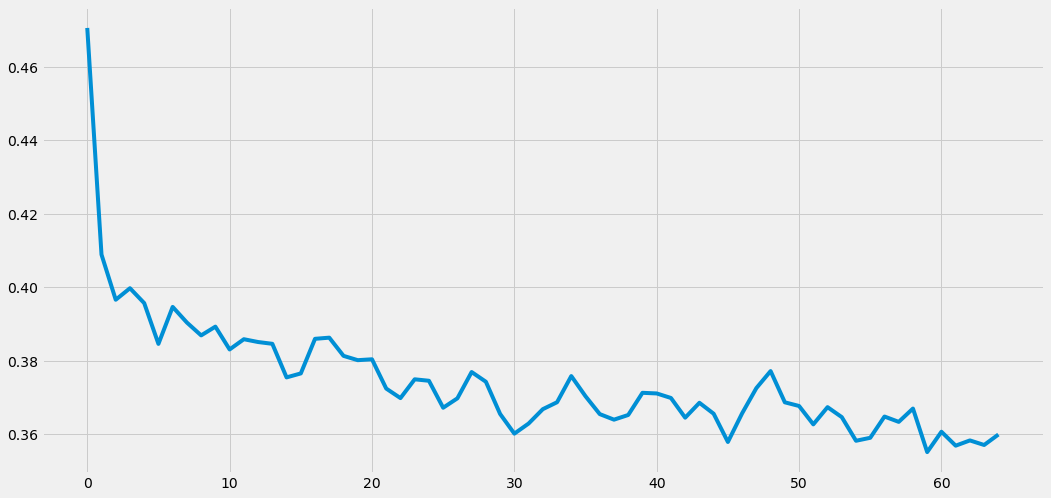

In [199]:
# plot losses
plt.plot(classifier.history['loss']);

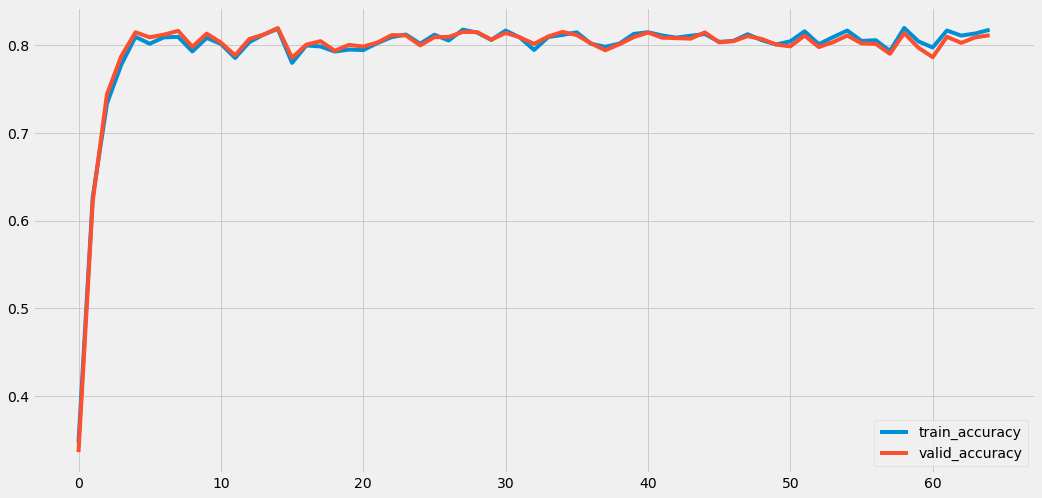

In [202]:
# plot accuracy
plt.plot(classifier.history['train_accuracy'], label="train_accuracy")
plt.plot(classifier.history['valid_accuracy'], label="valid_accuracy")
plt.legend();

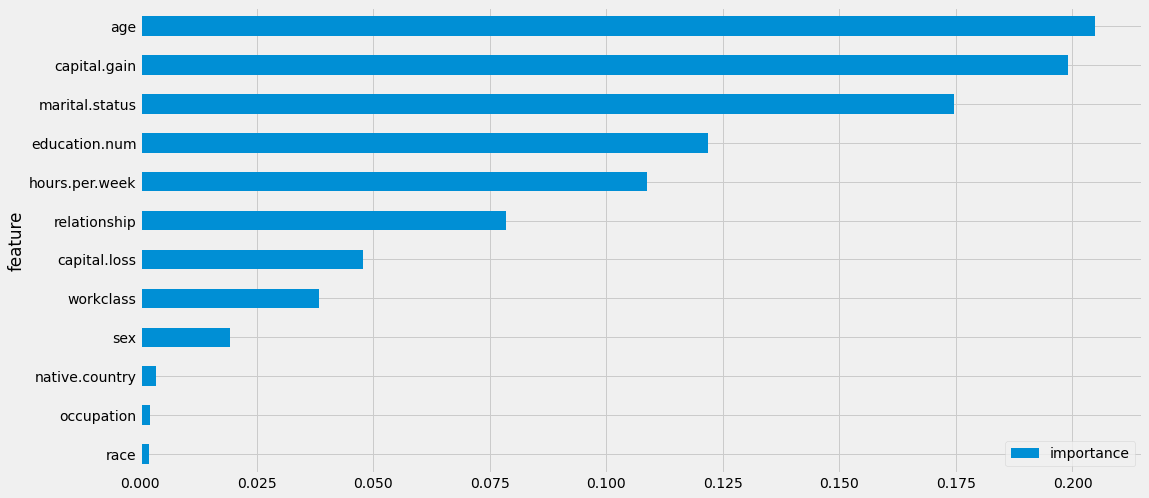

In [207]:
imp = pd.DataFrame({'feature': feature_name, 'importance': classifier.feature_importances_})
imp = imp.sort_values('importance').set_index('feature')
imp.plot(kind='barh');

In [75]:
from hyperopt import STATUS_OK, Trials, hp, space_eval, tpe, fmin
import lightgbm as lgb
from matplotlib import pyplot as plt
from matplotlib import rcParams
import numpy as np
from pathlib import Path
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold, train_test_split
import seaborn as sns
import warnings

In [168]:
seed = 42
target_col = 'income' # y 컬럼명
y_trn1 = df[target_col].values[:26000] # 학습1에서 y값
y_tst = df[target_col].values[26000:] # 학습1에서 y값

df.drop(target_col, axis=1, inplace=True)
X_trn1 = df.iloc[:26000].values # 학습1에서 X값
X_tst = df.iloc[26000:].values # 테스트에서 X값

feature_name = df.columns.tolist()

In [169]:
X_trn, X_val, y_trn, y_val = train_test_split(X_trn1, y_trn1, test_size=.2, random_state=seed)

In [86]:
params = {
    "objective": "binary",
    "n_estimators": 1000,
    "subsample_freq": 1,
    "random_state": 0,
    "n_jobs": -1,
}

space = {
    "learning_rate": hp.loguniform("learning_rate", np.log(0.01), np.log(0.3)),
    "num_leaves": hp.choice("num_leaves", [15, 31, 63, 127]),
    "colsample_bytree": hp.quniform("colsample_bytree", .5, .9, 0.1),
    "subsample": hp.quniform("subsample", .5, .9, 0.1),
    "min_child_samples": hp.choice('min_child_samples', [10, 25, 100])
}

In [105]:
lgbm =  LGBMClassifier( )
lgbm.fit(X_trn, y_trn)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [87]:
def objective(hyperparams):
    model = lgb.LGBMClassifier(**params, **hyperparams)
    model.fit(X=X_trn, y=y_trn,
              eval_set=[(X_val, y_val)],
              eval_metric="binary_logloss",
              early_stopping_rounds=10,
              verbose=False)
    score = model.best_score_["valid_0"]["binary_logloss"]

    return {'loss': score, 'status': STATUS_OK, 'model': model}

trials = Trials()
best = fmin(fn=objective, space=space, trials=trials,
            algo=tpe.suggest, max_evals=10, verbose=1)

hyperparams = space_eval(space, best)
n_best = trials.best_trial['result']['model'].best_iteration_
params.update(hyperparams)
print(params) # 최적의 params

100%|██████████| 10/10 [00:10<00:00,  1.02s/it, best loss: 0.26926703414604514]
{'objective': 'binary', 'n_estimators': 1000, 'subsample_freq': 1, 'random_state': 0, 'n_jobs': -1, 'colsample_bytree': 0.7000000000000001, 'learning_rate': 0.028408911274833883, 'min_child_samples': 10, 'num_leaves': 15, 'subsample': 0.8}


In [89]:
n_fold = 5
n_class = 2
cv = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=0)
p_val = np.zeros((X_trn1.shape[0], n_class))
p_tst = np.zeros((X_tst.shape[0], n_class))
for i, (i_trn, i_val) in enumerate(cv.split(X_trn1, y_trn1), 1):
    print(f'training model for CV #{i}')
    clf = lgb.LGBMClassifier(**params)
    clf.fit(X_trn1[i_trn], y_trn1[i_trn],
            eval_set=[(X_trn1[i_val], y_trn1[i_val])],
            eval_metric='binary',
            early_stopping_rounds=10)
    
    p_val[i_val, :] = clf.predict_proba(X_trn1[i_val])
    p_tst += clf.predict_proba(X_tst) / n_fold

training model for CV #1
[1]	valid_0's binary_logloss: 0.53995
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's binary_logloss: 0.531088
[3]	valid_0's binary_logloss: 0.521353
[4]	valid_0's binary_logloss: 0.513129
[5]	valid_0's binary_logloss: 0.504825
[6]	valid_0's binary_logloss: 0.496559
[7]	valid_0's binary_logloss: 0.488705
[8]	valid_0's binary_logloss: 0.483278
[9]	valid_0's binary_logloss: 0.476758
[10]	valid_0's binary_logloss: 0.470618
[11]	valid_0's binary_logloss: 0.464983
[12]	valid_0's binary_logloss: 0.459624
[13]	valid_0's binary_logloss: 0.455326
[14]	valid_0's binary_logloss: 0.449552
[15]	valid_0's binary_logloss: 0.444651
[16]	valid_0's binary_logloss: 0.439348
[17]	valid_0's binary_logloss: 0.435203
[18]	valid_0's binary_logloss: 0.430553
[19]	valid_0's binary_logloss: 0.425964
[20]	valid_0's binary_logloss: 0.421913
[21]	valid_0's binary_logloss: 0.417805
[22]	valid_0's binary_logloss: 0.414639
[23]	valid_0's binary_logloss: 0.410826
[24

In [92]:
print(f'{accuracy_score(y_trn1, np.argmax(p_val, axis=1)) * 100:.4f}%')

87.4538%


In [104]:
print(f'{accuracy_score(y_tst, np.argmax(p_tst, axis=1)) * 100:.4f}%')

86.9075%


In [103]:
cm_lgbm2 =  classification_report(y_trn1, np.argmax(p_val, axis=1))
print(cm_lgbm2)

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     19749
           1       0.79      0.66      0.72      6251

    accuracy                           0.87     26000
   macro avg       0.84      0.80      0.82     26000
weighted avg       0.87      0.87      0.87     26000



In [ ]:
lgbm =  LGBMClassifier( )
lgbm.fit(x_train, y_train)
from sklearn.metrics import classification_report

cm_lgbm =  classification_report(y_tst, y_pred)
print(cm_lgbm)

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4971
           1       0.77      0.65      0.70      1590

    accuracy                           0.87      6561
   macro avg       0.83      0.79      0.81      6561
weighted avg       0.86      0.87      0.86      6561



In [44]:
datapath = 'https://github.com/mchoimis/financialML/raw/main/income/'
df = pd.io.parsers.read_csv(datapath + 'income.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### 문제 02. 데이터 미리보기

In [45]:
# 데이터 형태 확인

print(df.shape)
print(df.columns)

(32561, 15)
Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### 문제 03. 데이터 확인하기

In [47]:
# 결측치를 NaN으로 바꾸기
df[df=='?'] = np.nan

In [48]:
# 최빈값으로 결측치 채우기
for col in ['workclass', 'occupation', 'native.country']:
    # 이어서 작성해주세요
    df[col].fillna(df[col].mode()[0], inplace=True)

In [49]:
# 결과 확인하기

df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [50]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

## Step 2. Feature Engineering

### 문제 04. 인풋 피처와 타겟값 만들기

In [51]:
X =  df.drop(['income', 'education', 'fnlwgt'], axis = 1)
y =  df['income']

In [52]:
X.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,Private,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,Private,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States


In [53]:
y.head()

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
Name: income, dtype: object

###  문제 05. 원 데이터를 training set과 test set으로 나누기

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
32098,40,State-gov,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,20,United-States
25206,39,Local-gov,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,38,United-States
23491,42,Private,10,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States
12367,27,Local-gov,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States
7054,38,Federal-gov,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States


In [55]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
32098,40,State-gov,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,20,United-States
25206,39,Local-gov,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,38,United-States
23491,42,Private,10,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States
12367,27,Local-gov,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States
7054,38,Federal-gov,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States


### 문제 06. 범주변수 처리하기 

In [56]:
from sklearn import preprocessing

categorical = ['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for feature in categorical:
        le =  preprocessing.LabelEncoder()
        X_train[feature] =  le.fit_transform(X_train[feature]) 
        X_test[feature] =   le.transform(X_test[feature]) 

### 문제 07. 범주변수 처리 결과 확인하기

In [57]:
# 변환된 범주변수 컬럼 확인하기(X_train)
X_train[categorical].head(3)

,workclass,marital.status,occupation,relationship,race,sex,native.country
32098,6,2,3,5,4,0,38
25206,1,2,6,0,4,1,38
23491,3,4,3,1,4,0,38


In [58]:
# 변환된 범주변수 컬럼 확인하기(X_test)
X_test[categorical].head(3)

,workclass,marital.status,occupation,relationship,race,sex,native.country
22278,3,6,11,4,4,0,38
8950,3,4,5,3,4,0,38
7838,3,4,7,1,1,0,39


### 참고: 범주변수의 처리
범주변수의 처리 방법은 크게 2가지로 나눌 수 있습니다.

- 클래스를 숫자로 변환
- 원-핫-인코딩(더미코딩)

금융 데이터의 경우 범주변수가 대부분을 차지하여, 원-핫-인코딩을 실시할 경우 전체 데이터셋의 다수가 0의 값을 가지게 되기도 합니다. 차원이 높은 데이터셋에 의미 없는 값이 많은 경우를 '피처가 sparse하다'고 하며, 학습효율이 높지 않을 수도 있으니 Feture Engineering 과정에서 유의해야 합니다.

In [59]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown="ignore")

tmp = enc.fit_transform(X_train[categorical]).toarray()
pd.DataFrame(tmp)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22787,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
22788,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
22789,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
22790,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### 문제 08. 피처 스케일 조정하기

In [60]:
from sklearn.preprocessing import StandardScaler

scaler =  StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [61]:
# 스케일 조정된 X_train 데이터 확인하기

X_train.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
32098,40,6,13,2,3,5,4,0,0,0,20,38
25206,39,1,9,2,6,0,4,1,0,0,38,38
23491,42,3,10,4,3,1,4,0,0,0,40,38
12367,27,1,9,4,4,3,4,1,0,0,40,38
7054,38,0,14,2,3,0,4,1,0,0,40,38


In [62]:
X_train_scaled.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,0.101484,2.600478,1.133894,-0.402341,-0.782234,2.214196,0.39298,-1.430470,-0.145189,-0.217407,-1.662414,0.262317
1,0.028248,-1.884720,-0.423425,-0.402341,-0.026696,-0.899410,0.39298,0.699071,-0.145189,-0.217407,-0.200753,0.262317
2,0.247956,-0.090641,-0.034095,0.926666,-0.782234,-0.276689,0.39298,-1.430470,-0.145189,-0.217407,-0.038346,0.262317
3,-0.850587,-1.884720,-0.423425,0.926666,-0.530388,0.968753,0.39298,0.699071,-0.145189,-0.217407,-0.038346,0.262317
4,-0.044989,-2.781760,1.523223,-0.402341,-0.782234,-0.899410,0.39298,0.699071,-0.145189,-0.217407,-0.038346,0.262317


In [63]:
print(min(X_train['age']))
print(max(X_train['age']))
print(np.mean(X_train['age']))
print(np.var(X_train['age']))
print('\n')
print(min(X_test['age']))
print(max(X_test['age']))
print(np.mean(X_test['age']))
print(np.var(X_test['age']))

17
90
38.61429448929449
186.44402697680837


17
90
38.505476507319074
185.14136114308525


In [64]:
print(min(X_train_scaled['age']))
print(max(X_train_scaled['age']))
print(np.mean(X_train_scaled['age']))
print(np.var(X_train_scaled['age']))
print('\n')
print(min(X_test_scaled['age']))
print(max(X_test_scaled['age']))
print(np.mean(X_test_scaled['age']))
print(np.var(X_test_scaled['age']))

-1.5829486507307393
3.7632934651328265
1.5671010251132251e-16
0.9999999999999883


-1.5829486507307393
3.7632934651328265
-0.007969414769866536
0.9930130996694251


### 참고: scikit-learn에서 제공하는 피처 스케일러(scaler)

- `StandardScaler`: 기본 스케일, 각 피처의 평균을 0, 표준편차를 1로 변환
- `RobustScaler`: 위와 유사하지만 평균 대신 중간값(median)과 일분위, 삼분위값(quartile)을 사용하여 이상치 영향을 최소화
- `MinMaxScaler`: 모든 피처의 최대치와 최소치가 각각 1, 0이 되도록 스케일 조정
- `Normalizer`: 피처(컬럼)이 아니라 row마다 정규화되며, 유클리드 거리가 1이 되도록 데이터를 조정하여 빠르게 학습할 수 있게 함

<p> 스케일 조정을 하는 이유는 데이터의 값이 너무 크거나 작을 때 학습이 제대로 되지 않을 수도 있기 때문입니다. 또한 스케일의 영향이 절대적인 분류기(예: knn과 같은 거리기반 알고리즘)의 경우, 스케일 조정을 필수적으로 검토해야 합니다.
    
<p> 반면 어떤 항목은 원본 데이터의 분포를 유지하는 것이 나을 수도 있습니다. 예를 들어, 데이터가 거의 한 곳에 집중되어 있는 feature를 표준화시켜 분포를 같게 만들었을 때, 작은 단위의 변화가 큰 차이를 나타내는 것처럼 학습될 수도 있습니다. 또한 스케일의 영향을 크게 받지 않는 분류기(예: 트리 기반 앙상블 알고리즘)를 사용할 경우에도 성능이 준수하게 나오거나 과대적합(overfitting)의 우려가 적다면 생략할 수도 있습니다.
    
<p> 스케일 조정시 유의해야할 점은 원본 데이터의 의미를 잃어버릴 수 있다는 것입니다. 최종적으로 답을 구하는 것이 목적이 아니라 모델의 해석이나 향후 다른 데이터셋으로의 응용이 더 중요할 때 원 피처에 대한 설명력을 잃어버린다면 모델 개선이 어려울 수도 있습니다. 이 점을 함께 고려하시면 좋겠습니다.

In [65]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [66]:
df = pd.concat([X_train, X_test], axis=0)
df

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
32098,40,6,13,2,3,5,4,0,0,0,20,38
25206,39,1,9,2,6,0,4,1,0,0,38,38
23491,42,3,10,4,3,1,4,0,0,0,40,38
12367,27,1,9,4,4,3,4,1,0,0,40,38
7054,38,0,14,2,3,0,4,1,0,0,40,38
...,...,...,...,...,...,...,...,...,...,...,...,...
21949,37,5,9,2,4,0,4,1,0,0,50,38
26405,26,3,9,2,11,0,4,1,0,0,40,38
23236,25,3,10,4,9,3,4,1,0,0,40,38
26823,34,3,9,4,6,4,2,0,0,0,48,38


In [67]:
df2 = pd.concat([y_train, y_test], axis=0)

In [68]:
df3 = pd.concat([df, df2], axis=1)

In [69]:
df3

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32098,40,6,13,2,3,5,4,0,0,0,20,38,<=50K
25206,39,1,9,2,6,0,4,1,0,0,38,38,>50K
23491,42,3,10,4,3,1,4,0,0,0,40,38,<=50K
12367,27,1,9,4,4,3,4,1,0,0,40,38,<=50K
7054,38,0,14,2,3,0,4,1,0,0,40,38,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21949,37,5,9,2,4,0,4,1,0,0,50,38,<=50K
26405,26,3,9,2,11,0,4,1,0,0,40,38,<=50K
23236,25,3,10,4,9,3,4,1,0,0,40,38,<=50K
26823,34,3,9,4,6,4,2,0,0,0,48,38,<=50K


In [70]:
title_mapping = {"<=50K": 0, ">50K": 1}
for i in [df3]:
    i['income'] = i['income'].map(title_mapping)

In [71]:
df3.to_csv("./train_numeric.csv", index=False)

In [ ]:
df = df3

In [ ]:
df["income"].value_counts()

0    24720
1     7841
Name: income, dtype: int64

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras import regularizers
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns

In [ ]:
df.shape

(32561, 13)

In [ ]:
vc = df['income'].value_counts().to_frame().reset_index()
vc['percent'] = vc["income"].apply(lambda x : round(100*float(x) / len(df), 2))
vc = vc.rename(columns = {"index" : "Target", "income" : "Count"})
vc

,Target,Count,percent
0,0,24720,75.92
1,1,7841,24.08


In [ ]:
bad = df[df['income'] == 0]
good = df[df['income'] == 1]

df = bad.append(good).sample(frac=1).reset_index(drop=True)
X = df.drop(['income'], axis = 1).values
Y = df["income"].values
X

array([[  47,    3,   13, ..., 2258,   40,   38],
       [  66,    3,    7, ...,    0,   20,   38],
       [  60,    5,    9, ...,    0,   50,   38],
       ...,
       [  36,    0,    9, ...,    0,   36,   38],
       [  36,    6,   14, ...,    0,   40,   38],
       [  43,    6,    9, ...,    0,   40,   38]])

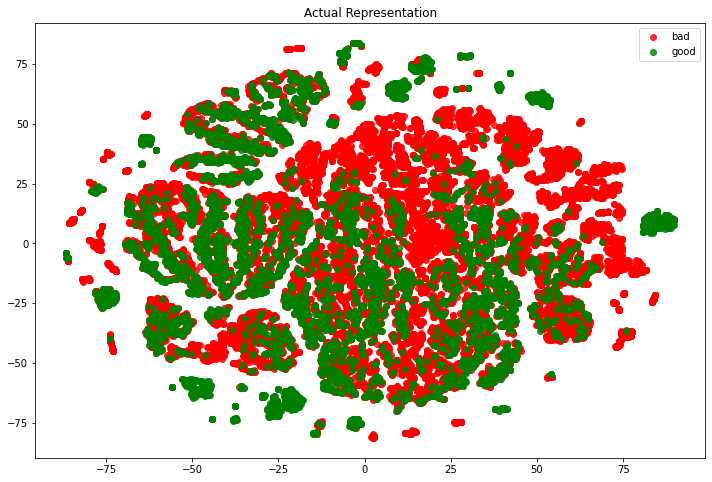

In [ ]:
def tsne_plot(x1, y1, name="graph.png"):
    tsne = TSNE(n_components=2, random_state=0)
    X_t = tsne.fit_transform(x1)

    plt.figure(figsize=(12, 8))
    plt.scatter(X_t[np.where(y1 == 0), 0], X_t[np.where(y1 == 0), 1], marker='o', color='r', linewidth='1', alpha=0.8, label='bad')
    plt.scatter(X_t[np.where(y1 == 1), 0], X_t[np.where(y1 == 1), 1], marker='o', color='g', linewidth='1', alpha=0.8, label='good')

    plt.legend(loc='best');
    plt.savefig(name);
    plt.title("Actual Representation");
    plt.show();
    
tsne_plot(X, Y, "original.png")

In [ ]:
## input layer 
input_layer = Input(shape=(X.shape[1],))

## encoding part
encoded = Dense(100, activation='tanh', activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoded = Dense(50, activation='relu')(encoded)

## decoding part
decoded = Dense(50, activation='tanh')(encoded)
decoded = Dense(100, activation='tanh')(encoded)

## output layer
output_layer = Dense(X.shape[1], activation='relu')(decoded)

In [ ]:
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer="adadelta", loss="mse")

In [ ]:
x = df.drop(["income"], axis=1)
y = df["income"].values

x_scale = preprocessing.MinMaxScaler().fit_transform(x.values)
x_bad, x_good = x_scale[y == 0], x_scale[y == 1]

In [ ]:
autoencoder.fit(x_bad, x_bad, 
                batch_size = 256, epochs = 10, 
                shuffle = True, validation_split = 0.20);

Epoch 1/10
78/78 [==============================] - 1s 5ms/step - loss: 0.2513 - val_loss: 0.2496
Epoch 2/10
78/78 [==============================] - 0s 3ms/step - loss: 0.2474 - val_loss: 0.2448
Epoch 3/10
78/78 [==============================] - 0s 4ms/step - loss: 0.2413 - val_loss: 0.2377
Epoch 4/10
78/78 [==============================] - 0s 4ms/step - loss: 0.2340 - val_loss: 0.2304
Epoch 5/10
78/78 [==============================] - 0s 4ms/step - loss: 0.2267 - val_loss: 0.2233
Epoch 6/10
78/78 [==============================] - 0s 3ms/step - loss: 0.2198 - val_loss: 0.2166
Epoch 7/10
78/78 [==============================] - 0s 4ms/step - loss: 0.2132 - val_loss: 0.2101
Epoch 8/10
78/78 [==============================] - 0s 3ms/step - loss: 0.2069 - val_loss: 0.2040
Epoch 9/10
78/78 [==============================] - 0s 3ms/step - loss: 0.2009 - val_loss: 0.1981
Epoch 10/10
78/78 [==============================] - 0s 3ms/step - loss: 0.1951 - val_loss: 0.1924


In [ ]:
hidden_representation = Sequential()
hidden_representation.add(autoencoder.layers[0])
hidden_representation.add(autoencoder.layers[1])
hidden_representation.add(autoencoder.layers[2])

In [ ]:
bad_hid_rep = hidden_representation.predict(x_bad)
good_hid_rep = hidden_representation.predict(x_good)

In [ ]:
x_bad

array([[0.67123288, 0.42857143, 0.4       , ..., 0.        , 0.19387755,
        0.95      ],
       [0.5890411 , 0.71428571, 0.53333333, ..., 0.        , 0.5       ,
        0.95      ],
       [0.32876712, 0.71428571, 0.53333333, ..., 0.        , 0.39795918,
        0.95      ],
       ...,
       [0.26027397, 0.        , 0.53333333, ..., 0.        , 0.35714286,
        0.95      ],
       [0.26027397, 0.85714286, 0.86666667, ..., 0.        , 0.39795918,
        0.95      ],
       [0.35616438, 0.85714286, 0.53333333, ..., 0.        , 0.39795918,
        0.95      ]])

In [ ]:
bad_hid_rep

array([[0.        , 0.        , 0.        , ..., 0.03671459, 0.10732648,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.04163152, 0.08357203,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.06006759,
        0.        ],
       ...,
       [0.        , 0.03846769, 0.        , ..., 0.        , 0.23480393,
        0.        ],
       [0.        , 0.02725893, 0.        , ..., 0.2120866 , 0.21128273,
        0.        ],
       [0.        , 0.01962187, 0.        , ..., 0.06897608, 0.10304839,
        0.        ]], dtype=float32)

In [ ]:
x_bad.shape

(24720, 12)

In [ ]:
bad_hid_rep.shape

(24720, 50)

In [ ]:
def tsne_plot2(x1, y1, name="graph.png"):
    tsne = TSNE(n_components=2, random_state=0)
    X_t = tsne.fit_transform(x1)

    plt.figure(figsize=(12, 8))
    plt.scatter(X_t[np.where(y1 == 0), 0], X_t[np.where(y1 == 0), 1], marker='o', color='r', linewidth='1', alpha=0.8, label='bad')
    plt.scatter(X_t[np.where(y1 == 1), 0], X_t[np.where(y1 == 1), 1], marker='o', color='g', linewidth='1', alpha=0.8, label='good')

    plt.legend(loc='best');
    plt.savefig(name);
    plt.title("Latent Representation");
    plt.show();

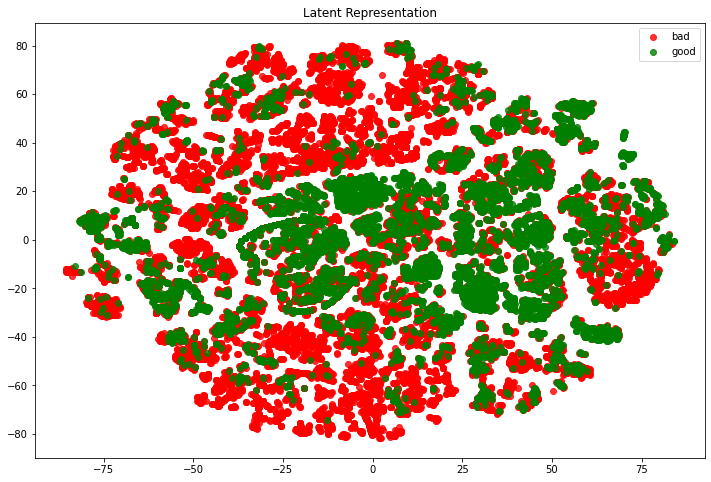

In [ ]:
rep_x = np.append(bad_hid_rep, good_hid_rep, axis = 0)
y_b = np.zeros(bad_hid_rep.shape[0]) # 라벨0
y_g = np.ones(good_hid_rep.shape[0]) # 라벨1
rep_y = np.append(y_b, y_g)
tsne_plot2(rep_x, rep_y, "latent_representation.png")

In [ ]:
train_x, val_x, train_y, val_y = train_test_split(rep_x, rep_y, test_size=0.25)
clf = LogisticRegression(solver="lbfgs").fit(train_x, train_y)
pred_y = clf.predict(val_x)

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_y))

print ("")
print ("Accuracy Score: ", accuracy_score(val_y, pred_y))


Classification Report: 
              precision    recall  f1-score   support

         0.0       0.84      0.94      0.88      6147
         1.0       0.69      0.44      0.54      1994

    accuracy                           0.81      8141
   macro avg       0.76      0.69      0.71      8141
weighted avg       0.80      0.81      0.80      8141


Accuracy Score:  0.814641935880113


In [ ]:
rep_x.shape

(32561, 50)

In [ ]:
! [ -e /content ] && pip install -Uqq fastai  # upgrade fastai on colab

In [ ]:
from fastai.tabular.all import *
splits = RandomSplitter(valid_pct=0.2)(range_of(df))

to = TabularPandas(df, procs=[Categorify, FillMissing, Normalize],
                   cont_names = ['age', 'workclass', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week'],
                   y_names='income',
                   splits=splits)

In [ ]:
dls = to.dataloaders(bs=64)

In [ ]:
learn = tabular_learner(dls, metrics=accuracy)
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.394095,0.367189,0.835454,00:03


In [ ]:
dls.xs.shape

(18234, 11)

In [ ]:
title_mapping = {"<=50K": 0, ">50K": 1}
for i in [df3]:
    i['income'] = i['income'].map(title_mapping)

In [ ]:
X_tst = df[18234:].copy()
y_tst = X_tst["income"]
X_tst.drop(["income"], axis=1, inplace=True)

In [ ]:
dl = learn.dls.test_dl(X_tst)
preds = learn.get_preds(dl=dl)

In [ ]:
type(X_tst)

pandas.core.frame.DataFrame

In [ ]:
preds[0]

tensor([[0.8241, 0.1759],
        [0.8625, 0.1375],
        [0.8824, 0.1176],
        ...,
        [0.9169, 0.0831],
        [0.2245, 0.7755],
        [0.7166, 0.2834]])

In [ ]:
preds[0][:,1].numpy()

array([0.1758707 , 0.13750023, 0.11764041, ..., 0.08308791, 0.775527  ,
       0.28343463], dtype=float32)

In [ ]:
preds = (preds[0].numpy()[:, 1] >= 0.5).astype('int')
preds

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
df.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32098,40,6,13,2,3,5,4,0,0,0,20,38,NaN
25206,39,1,9,2,6,0,4,1,0,0,38,38,NaN
23491,42,3,10,4,3,1,4,0,0,0,40,38,NaN
12367,27,1,9,4,4,3,4,1,0,0,40,38,NaN
7054,38,0,14,2,3,0,4,1,0,0,40,38,NaN


## Step 3. 선형 분류모델 구현하기

### 문제 10. 원 데이터를 이용하여 Logistic Regression 모델 돌려보기

In [ ]:
# Feature scaling 전 원본 데이터
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg =  LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### 문제 11. 원 데이터를 이용한 Logistic Regression 모델의 정확도 확인하기

In [ ]:
y_pred =  logreg.predict(X_test)
# logreg_score =  accuracy_score(y_test, y_pred)
print('Logistic Regression accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score: 0.8057


### 문제 12. 스케일 조정된 데이터를 이용하여 Logistic Regression 모델 돌려보기

In [ ]:
# Feature scaling 후 변환 데이터
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train) ##

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### 문제 13. 스케일 조정된 데이터를 이용한 Logistic Regression 모델의 정확도 확인하기

In [ ]:
y_pred = logreg.predict(X_test_scaled)  ##
logreg_score =  accuracy_score(y_test, y_pred)
print('Logistic Regression (scaled data) accuracy score: {0:0.4f}'. format(logreg_score))

Logistic Regression (scaled data) accuracy score: 0.8222


In [ ]:
# 예측된 값 확인하기
y_pred

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

### 문제 14. 스케일 조정된 데이터를 이용한 Logistic Regression 모델 분류결과 확인하기

In [ ]:
from sklearn.metrics import classification_report

cm_logreg =  classification_report(y_test, y_pred) 
print(cm_logreg)

              precision    recall  f1-score   support

       <=50K       0.84      0.94      0.89      7410
        >50K       0.71      0.44      0.55      2359

    accuracy                           0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769



## Step 4. 트리기반 분류모델의 구현

### 문제 15. Random Forest 모델 구현하고 정확도 확인하기

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
criterion='gini' # The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain (정보 이득)
n_estimators=100 # The number of trees in the forest.

In [ ]:
y_pred = rfc.predict(X_test) 
rfc_score =  accuracy_score(y_test, y_pred)
print('Random Forest Model accuracy score : {0:0.4f}'. format(rfc_score ))

### 문제 16. Random Forest 모델의 Confusion Matrix 확인하기

In [ ]:
from sklearn.metrics import confusion_matrix

cm =  confusion_matrix(y_test, y_pred)
print('Confusion Matrix for Binary Labels \n')
# print('Confusion Matrix for Binary Labels\n')
# print('Actual class')
# print('Predicted', '[[True Positive', 'False Positive]')
# print('         ', '[False Negative', 'True Negative]]')
print(cm)

In [ ]:
# Confusion Matrix에서 Recall과 Precision 계산하기

print('\nRecall for Class [<=50K] = ', cm[0,0], '/' , cm[0,0] + cm[0,1])
print('\nPrecision for Class [<=50K] = ', cm[0,0], '/' , cm[0,0] + cm[1,0])
print('\nRecall for Class [>50K] = ', cm[1,1], '/' , cm[1,0] + cm[1,1])
print('\nPrecision for Class [>50K] = ', cm[1,1], '/' , cm[0,1] + cm[1,1])

### 문제 17. Random Forest 모델의 분류결과 확인하기

In [ ]:
from sklearn.metrics import classification_report

cm_rfc =  classification_report(y_test, y_pred)
print(cm_rfc)

## Step 5. 부스팅 기반 분류모델의 구현

### 부스팅(Boosting) 모델 개요


- 부스팅은 여러 트리의 적합 결과를 합하는 앙상블 알고리즘의 하나로, 이 때 sequential의 개념이 추가되어 있습니다. 즉 연속적인 weak learner, 바로 직전 weak learner의 error를 반영한 현재 weak learner를 잡겠다는 것입니다. 이 아이디어는 Gradient Boosting Model(GBM)에서 loss를 계속 줄이는 방향으로 weak learner를 잡는다는 개념으로 확장됩니다.

![boost](https://pluralsight2.imgix.net/guides/81232a78-2e99-4ccc-ba8e-8cd873625fdf_2.jpg)


- 부스팅 계열 모델은 AdaBoost, Gradient Boosting Model(GBM), XGBoost, LightGBM 등이 있습니다.


- 더 자세한 내용은 다음 Step에서 살펴보겠습니다.

### 문제 18. Gradient Boosting 모델 구현하고 정확도 확인하기

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc =  GradientBoostingClassifier(random_state=0)
gbc.fit(X_train, y_train)

In [ ]:
y_pred =  gbc.predict(X_test)
gbc_score =  accuracy_score(y_test, y_pred)
print('Gradient Boosting accuracy score : {0:0.4f}'.format(gbc_score))

### 문제 19. Gradient Boosting 모델의 분류결과 확인하기

In [ ]:
from sklearn.metrics import classification_report

cm_gbc =  classification_report(y_test, y_pred)
print(cm_gbc)

### 문제 20. Light GBM 구현하고 정확도 확인하기

In [97]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

lgbm =  LGBMClassifier(random_state=0)
lgbm.fit(X_trn1, y_trn1)
y_pred =  lgbm.predict(X_tst)

lgbm_score =  accuracy_score(y_tst, y_pred)
print('LGBM Model accuracy score : {0:0.4f}'.format(lgbm_score))

LGBM Model accuracy score : 0.8674


### 문제 21. Light GBM 분류결과 확인하기

In [99]:
from sklearn.metrics import classification_report

cm_lgbm =  classification_report(y_tst, y_pred)
print(cm_lgbm)

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4971
           1       0.77      0.65      0.70      1590

    accuracy                           0.87      6561
   macro avg       0.83      0.79      0.81      6561
weighted avg       0.86      0.87      0.86      6561



### 문제 22. 요약: 소득 이진분류 예측모델의 정확도 비교하기

In [ ]:
print ('Accuracy Comparisons for Binary Models\n')
print ('logreg_score:', '{0:0.5f}'.format(logreg_score))
print ('rfc_score   :', '{0:0.5f}'.format(rfc_score))
print ('gbc_score   :', '{0:0.5f}'.format(gbc_score ))
print ('lgbm_score  :', '{0:0.5f}'.format(lgbm_score))

### 문제 23. 최종 이진분류 모델 비교하기

In [ ]:
print ('Classification Comparions for Binary Models\n')
print ('logreg_score:', '{0:0.4f}'.format(logreg_score))
print (cm_logreg)
print ('rfc_score   :', '{0:0.4f}'.format(rfc_score))
print (cm_rfc)
print ('gbc_score   :', '{0:0.4f}'.format(gbc_score ))
print (cm_gbc)
print ('lgbm_score  :', '{0:0.4f}'.format(lgbm_score))
print (cm_lgbm)

## Step 6. 다중분류 모델의 구현

### 데이터 소개

- 두번째로 쓸 데이터는 앞에서 사용한 US Adult 데이터에 모의로 생성한 금융 변수를 수정(+)·추가(++)한 것이며, 컬럼은 다음과 같습니다. 

income_ext.csv
- `age` : 나이
- `workclass`: 직업구분
- `education`: 교육수준
- `education.num`: 교육수준(numerically coded)
- `marital.status`: 혼인상태
- `occupation` : 직업
- `relationship`: 가족관계
- `sex`: 성별
- `capital.gain`: 자본이득
- `capital.loss`: 자본손실
- `hours.per.week`: 주당 근로시간
- `spending.groc`: 식료품 소비 금액(continuous) ++
- `spending.med`: 병의원 소비 금액(continuous) ++
- `spending.trav`: 여행 레저 소비 금액(continuous) ++
- `income` : 소득 이진구분( <=50K: 0, >50K: 1 ) +
- `income.num` : 소득금액(continuous) ++

### 문제 24. 데이터 불러오기

In [ ]:
data =  pd.read_csv(datapath + 'income_ext.csv')
print(data.shape)
print(data.columns)

(32561, 19)
Index(['age', 'workclass', 'education', 'education.num', 'marital.status',
       'occupation', 'relationship', 'sex', 'capital.gain', 'capital.loss',
       'hours.per.week', 'spend.groc', 'spend.med', 'spend.trav', 'asset',
       'balance', 'native.country', 'income', 'income.num'],
      dtype='object')


In [ ]:
data.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,sex,capital.gain,capital.loss,hours.per.week,spend.groc,spend.med,spend.trav,asset,balance,native.country,income,income.num
0,90,?,HS-grad,9,Widowed,?,Not-in-family,Female,0,4356,40,77053,13687,3478,345498,-36,United-States,0,43713
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,Female,0,4356,18,132870,27294,27567,242642,57638,United-States,0,33113
2,66,?,Some-college,10,Widowed,?,Unmarried,Female,0,4356,40,186061,32029,24506,578403,46028,United-States,0,31652
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,Female,0,3900,40,140359,22449,23655,229303,7899,United-States,0,55087
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,Female,0,3900,40,264663,40863,71439,672614,57675,United-States,0,85583


In [ ]:
data['income'].value_counts()

0    24720
1     7841
Name: income, dtype: int64

### Light GBM 개요


- Decision Tree의 앙상블 모델인 Gradient Boosting Decision Tree (GBDT)는 실무에서 XGboost(eXtreme Gradient Boosting) 등으로도 알려져 있습니다. 각각의 반복에서 GBDT는 음의 기울기(Residual Error)를 적합함으로써 Decision Tree를 학습시키게 됩니다. 


- 그러나 고차원 대용량 데이터에서는 너무 많은 시간의 소모가 발생하였는데, 왜냐하면 모든 가능한 분할점에 대해 정보 획득(information gain)을 평가하기 위해 데이터 전부를 스캔해야 했기 때문입니다. 


- Light GBM은 이러한 Gradient Boosting 모델의 단점을 극복하기 위해 샘플링 등의 기법을 이용하여 <b>스캔하는 데이터 양을 줄임으로써</b> 분석 시간을 획기적으로 단축시킨 방법론입니다.


- LGBM은 <b>범주변수가 많은 정형 데이터</b>와 <b>다중분류</b>에 유용한 알고리즘으로, 간단한 원리를 알아두시면 도움이 될 것입니다.


- 참고링크: Light GBM: A Highly Efficient Gradient Boosting Decision Tree (NIPS 2017)
[https://papers.nips.cc/paper/2017/hash/6449f44a102fde848669bdd9eb6b76fa-Abstract.html ] 

In [ ]:
data.shape

(32561, 19)

In [ ]:
32561*19

618659

In [ ]:
data size large == n ++ ==> graident-based one-side sampling 
feature high == p ++ ==> exclusive feature bundling ==> one-hot encoding --> sparsity (multi-categorical) 

n * p

### Light GBM 파라미터 설명

- `objective` : 목적함수, regression, binary, multiclass 가능
- `categorical_feature` : 범주변수임을 선언
- `max_cat_group` : 범주형 변수가 많을 때 과적합을 방지하는 분기 포인트를 찾아서 카테고리 그룹을 max_cat_group 그룹으로 합치고 그룹 경계선에서 분기 포인트를 찾게 됨, 기본값은 64
- `boosting`: 부스팅 방법, 기본값은 gbdt(gradient boosting decision tree)이며 샘플링을 이용하는 goss(Gradient-based One-Side Sampling), 딥러닝의 드롭아웃과 같은 dart (Dropouts meet Multiple Additive Regression Trees), rf (Random Forest) 등의 기법 선택 가능
- `learning_rate` : 학습율, 각 예측기마다 얼마나 가중치를 주어 학습하게 할것인지 결정
- `early_stopping_round` : 더 이상 validation 데이터에서 성능 향상이 없으면 멈추게끔 하는 단위 
- `metric`: loss 측정 기준, binary_logloss, multi_logloss, mae, rmse, auc, cross_entropy 등이 있다

### 문제 25. 데이터 확인하기

In [ ]:
# Create raw dataset for input
X = data.drop(['education', 'income', 'income.num'], axis=1)   # Drop columns
y = data['income.num']  # Choose column

In [ ]:
# X raw 데이터 확인하기

X.head()

,age,workclass,education.num,marital.status,occupation,relationship,sex,capital.gain,capital.loss,hours.per.week,spend.groc,spend.med,spend.trav,asset,balance,native.country
0,90,?,9,Widowed,?,Not-in-family,Female,0,4356,40,77053,13687,3478,345498,-36,United-States
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,Female,0,4356,18,132870,27294,27567,242642,57638,United-States
2,66,?,10,Widowed,?,Unmarried,Female,0,4356,40,186061,32029,24506,578403,46028,United-States
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,Female,0,3900,40,140359,22449,23655,229303,7899,United-States
4,41,Private,10,Separated,Prof-specialty,Own-child,Female,0,3900,40,264663,40863,71439,672614,57675,United-States


In [ ]:
# y raw 데이터 확인하기

y.head()

0    43713
1    33113
2    31652
3    55087
4    85583
Name: income.num, dtype: int64

### 문제 26. 다중분류 클래스 생성하기

In [ ]:
def value_change(x):
    if x <= 10000: return 0
    if x >  10000 and x <= 20000 : return 1
    if x >  20000 and x <= 30000 : return 2
    if x >  30000 and x <= 40000 : return 3
    if x >  40000 and x <= 50000 : return 4
    if x >  50000 and x <= 60000 : return 5
    if x >  60000 and x <= 70000 : return 6
    if x >  70000 and x <= 80000 : return 7
    if x >  80000 and x <= 90000 : return 8
    if x >  90000 and x <= 100000 : return 9
    return 10                          
                                       ## Define function

y = y.apply(lambda x: value_change(x))  ## Apply Lambda function

In [ ]:
# 생성한 레이블 확인하기
y.unique()

array([ 4,  3,  5,  8,  7,  9,  2,  6,  1,  0, 10])

In [ ]:
y.value_counts()

6     3318
9     3310
7     3276
4     3273
8     3257
1     3250
5     3246
3     3233
2     3180
0     3176
10      42
Name: income.num, dtype: int64

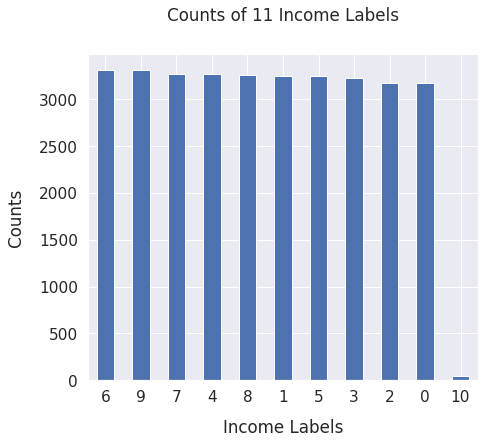

In [ ]:
sns.set(font_scale=1.4)
y.value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Income Labels", labelpad=14)
plt.ylabel("Counts", labelpad=14)
plt.title("Counts of 11 Income Labels\n", y=1.02);

### 문제 27. Feature Engineering

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn import preprocessing

categorical = ['workclass', 'marital.status', 'occupation', 'relationship', 'sex', 'native.country']
for feature in categorical:
        le =  preprocessing.LabelEncoder()
        x_train[feature] =  le.fit_transform(x_train[feature])
        x_test[feature] =  le.transform(x_test[feature])

In [ ]:
x_train[categorical].head()

,workclass,marital.status,occupation,relationship,sex,native.country
32098,7,2,4,5,0,39
25206,2,2,7,0,1,39
23491,4,4,4,1,0,39
12367,2,4,5,3,1,39
7054,1,2,4,0,1,39


### 문제 28. Light GBM 을 이용하여 다중분류 구현하기

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

lgbm =  LGBMClassifier( )
lgbm.fit(x_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
boosting_type='gbdt' 
‘gbdt’, traditional Gradient Boosting Decision Tree. 
‘dart’, Dropouts meet Multiple Additive Regression Trees.
‘goss’, Gradient-based One-Side Sampling.
‘rf’, Random Forest

multi_class='multiclass'


### 문제 29. Light GBM  다중분류 결과  확인하기: Accuracy, Confusion Matrix, Heatmap

In [ ]:
## 정확도 구하기
y_pred1 =  lgbm.predict(x_test)

lgbm_score =  accuracy_score(y_test, y_pred1)
print('LGBM Model accuracy score : {0:0.4f}'.format(lgbm_score))

LGBM Model accuracy score : 0.8119


In [ ]:
pd.DataFrame(y_test).head(10)

,income.num
22278,6
8950,6
7838,7
16505,3
19140,2
12319,7
28589,7
10000,1
28530,3
24237,6


In [ ]:
pd.DataFrame(y_pred1).head(10)

,0
0,6
1,6
2,7
3,1
4,3
5,7
6,7
7,1
8,3
9,6


In [ ]:
## Confusion Matrix 확인하기
from sklearn.metrics import confusion_matrix
cm1 =  confusion_matrix(y_test, y_pred1)
print('LGBM Confusion Matrix for 11-class Labels\n')
print(cm1)


LGBM Confusion Matrix for 11-class Labels

[[934  41   4   3   1   0   2   3   0   0   0]
 [ 40 869  46  13   1   0   0   0   0   0   0]
 [ 23  42 807  45   7   0   2   2   0   2   0]
 [ 13  20  75 838  62   6   2   2   1   0   0]
 [ 11  17  16  73 758  70  12   4   5   3   0]
 [  8  13  18  22  76 758  78  12  11   6   0]
 [ 10   7  11  12  11  92 702  78  13  15   0]
 [ 12   8  10   8  11  12  77 730  91  23   0]
 [  7  10  10   6   9   7  12 102 727  88   0]
 [  8   7  10  16  16   6   7  29  62 808   0]
 [  0   0   0   0   0   0   0   0   0  12   0]]


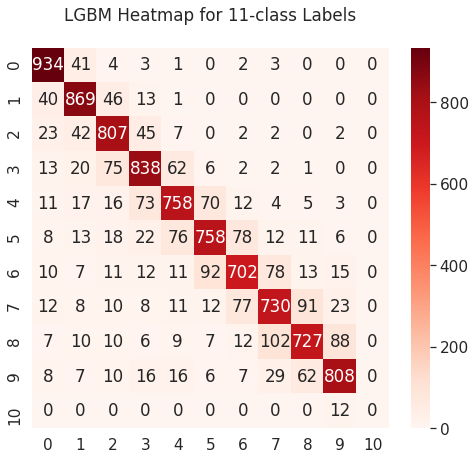

In [ ]:
## 히트맵으로 시각화하기
plt.figure(figsize=[8,7])
sns.heatmap(cm1, cmap='Reds', annot=True, fmt='.0f')
plt.title('LGBM Heatmap for 11-class Labels\n')
plt.show()

In [ ]:
print('LGBM Model accuracy score : {0:0.4f}'.format(lgbm_score))
print('\n')
print(classification_report(y_test, y_pred1))

LGBM Model accuracy score : 0.8119


              precision    recall  f1-score   support

           0       0.88      0.95      0.91       988
           1       0.84      0.90      0.87       969
           2       0.80      0.87      0.83       930
           3       0.81      0.82      0.82      1019
           4       0.80      0.78      0.79       969
           5       0.80      0.76      0.78      1002
           6       0.79      0.74      0.76       951
           7       0.76      0.74      0.75       982
           8       0.80      0.74      0.77       978
           9       0.84      0.83      0.84       969
          10       0.00      0.00      0.00        12

    accuracy                           0.81      9769
   macro avg       0.74      0.74      0.74      9769
weighted avg       0.81      0.81      0.81      9769



### 문제 30. Random Forest 모델로 다중분류 구현하고 정확도 확인하기

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc =  RandomForestClassifier() 
rfc.fit(x_train, y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred =  rfc.predict(x_test)
rfc_score =  accuracy_score(y_test, y_pred)
print('Random Forest Model accuracy score : {0:0.4f}'. format(rfc_score))

Random Forest Model accuracy score : 0.7710


In [ ]:
모델 개선 --> 정확도 개선, F1 스코어 개선 <- 모델 변경, 모델의 파라미터 변경, 데이터 변경(처리, 피처 엔지니어링, 정제, 아웃라이어 제거, 변수 추가) 11개 --> ? 개

## Step 7. 다중분류 모델의 평가와 개선

### 문제 31. Random Forest 다중분류 모델의 정확도 확인하기

In [ ]:
## 이전 Step 복습
y_pred = rfc.predict(x_test)
rfc_score = accuracy_score(y_test, y_pred)
print('Randoom Forest Model accuracy score : {0:0.4f}'. format(rfc_score)) 

Randoom Forest Model accuracy score : 0.7710


In [ ]:
평가방법: 정확도(exact match), 인접 정확도 1, 2, 3, ... 10 <-- 멀티 클래스 분류 레이블의 임의성, 불명확성  // [1000-2000] [1234-2194] 

### 문제 32. Random Forest  다중분류 모델의 인접정확도 구하기

In [ ]:
## 인접 정확도의 계산
precise_accuracy =  np.sum(y_pred==y_test) / len(y_pred)
adjacent_accuracy =  np.sum(np.abs(y_pred - y_test) <= 1) / len(y_pred)

print('precise accuracy: {0:0.4f}'. format(precise_accuracy))
print('adjacent accuracy: {0:0.4f}'. format(adjacent_accuracy))

precise accuracy: 0.7710
adjacent accuracy: 0.9295


### 문제 33. Random Forest  다중분류 모델의 Confusion Matrix 확인하기

In [ ]:
print(cm1) # light gbm 

[[934  41   4   3   1   0   2   3   0   0   0]
 [ 40 869  46  13   1   0   0   0   0   0   0]
 [ 23  42 807  45   7   0   2   2   0   2   0]
 [ 13  20  75 838  62   6   2   2   1   0   0]
 [ 11  17  16  73 758  70  12   4   5   3   0]
 [  8  13  18  22  76 758  78  12  11   6   0]
 [ 10   7  11  12  11  92 702  78  13  15   0]
 [ 12   8  10   8  11  12  77 730  91  23   0]
 [  7  10  10   6   9   7  12 102 727  88   0]
 [  8   7  10  16  16   6   7  29  62 808   0]
 [  0   0   0   0   0   0   0   0   0  12   0]]


In [ ]:
from sklearn.metrics import confusion_matrix
cm2 =  confusion_matrix(y_test, y_pred)
print('Random Forest Confusion Matrix for 11-class Labels\n')
print(cm2)

Random Forest Confusion Matrix for 11-class Labels

[[935  44   3   4   1   1   0   0   0   0   0]
 [ 53 839  61   8   3   2   3   0   0   0   0]
 [ 27  71 772  41  13   1   3   0   1   1   0]
 [ 17  15  95 783  83  11   6   2   6   1   0]
 [ 16  18  11  69 733  86  17   6   7   6   0]
 [ 13  14  17  15  86 722 101  16  14   4   0]
 [ 11   9   9  13  16 101 687  85   8  12   0]
 [ 12  11   9   4  13  19 106 682  99  27   0]
 [  7  10   8   9  13  15  21 115 644 136   0]
 [ 10   6   9  15  14  20  15  41 104 735   0]
 [  0   0   0   0   0   0   0   0   0  12   0]]


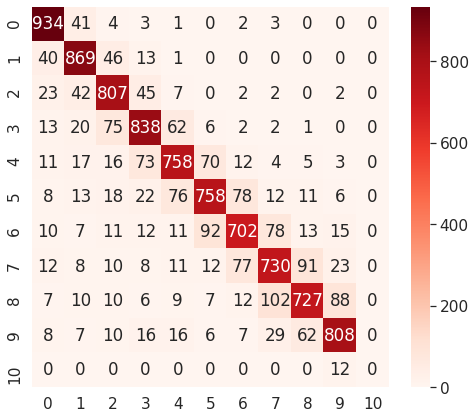

In [ ]:
plt.figure(figsize=[8, 7])
sns.heatmap(cm1, cmap='Reds', annot=True, fmt='.0f')
plt.show()

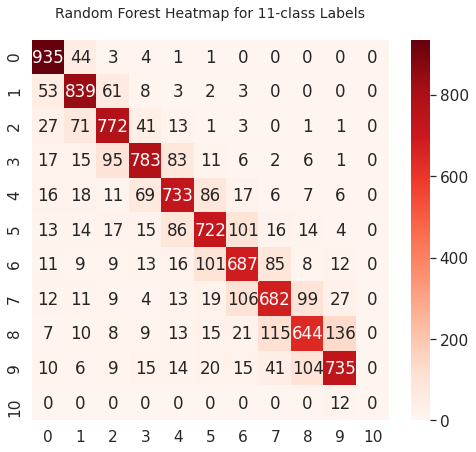

In [ ]:
## Seaborn Heatmap

plt.figure(figsize=[8, 7])
sns.heatmap(cm2, cmap='Reds', annot=True, fmt='.0f')
plt.title('Random Forest Heatmap for 11-class Labels\n', fontsize=14)
plt.show()

### 문제 34. Random Forest  다중분류 모델의 분류결과 확인하기

In [ ]:
from sklearn.metrics import classification_report

print('Random Forest precise  accuracy for 11 labels: {0:0.4f}'. format(precise_accuracy))
print('Random Forest adjacent accuracy for 11 labels: {0:0.4f}'. format(adjacent_accuracy))
print('\n')
print(classification_report(y_test, y_pred ))

Random Forest precise  accuracy for 11 labels: 0.7710
Random Forest adjacent accuracy for 11 labels: 0.9295


              precision    recall  f1-score   support

           0       0.85      0.95      0.90       988
           1       0.81      0.87      0.84       969
           2       0.78      0.83      0.80       930
           3       0.81      0.77      0.79      1019
           4       0.75      0.76      0.75       969
           5       0.74      0.72      0.73      1002
           6       0.72      0.72      0.72       951
           7       0.72      0.69      0.71       982
           8       0.73      0.66      0.69       978
           9       0.79      0.76      0.77       969
          10       0.00      0.00      0.00        12

    accuracy                           0.77      9769
   macro avg       0.70      0.70      0.70      9769
weighted avg       0.77      0.77      0.77      9769



### 문제 35. 적절한 클래스 수로 변환하여 모델 개선하기

In [ ]:
def value_change(x):
    if x <= 20000: return 0
    if x >  20000 and x <= 50000 : return 1
    if x >  50000 and x <= 70000 : return 2
    if x >  70000 and x <= 90000 : return 3 
    return 4
                                       ## Define new function
y = data['income.num'].apply(lambda x: value_change(x))   ## Apply Lambda function

In [ ]:
y.value_counts()

1    9686
2    6564
3    6533
0    6426
4    3352
Name: income.num, dtype: int64

In [ ]:
y.value_counts().sum()

32561

In [ ]:
9686 / 32561

0.29747243635023496

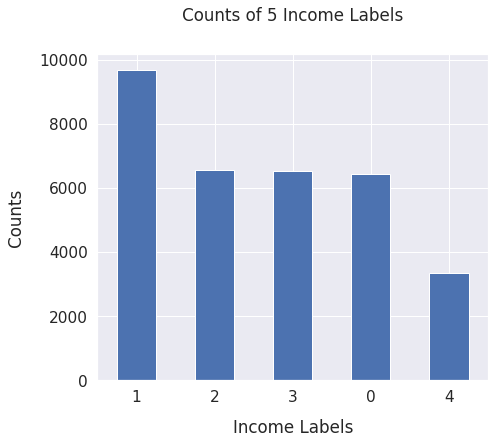

In [ ]:
sns.set(font_scale=1.4)
y.value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Income Labels", labelpad=14)
plt.ylabel("Counts", labelpad=14)
plt.title("Counts of 5 Income Labels\n", y=1.02);

### 문제 36. Feature Engineering

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
from sklearn import preprocessing

categorical = ['workclass', 'marital.status', 'occupation', 'relationship', 'sex', 'native.country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        x_train[feature] = le.fit_transform(x_train[feature])
        x_test[feature] = le.transform(x_test[feature])

### 문제 37. 변경한 클래스를 이용한 Random Forest 다중분류 모델의 개선결과 확인하기

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier(random_state=0)
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
## Confusion Matrix 확인하기
y_pred =  rfc.predict(x_test)
cm3 =  confusion_matrix(y_test, y_pred)
print('Random Forest Confusion Matrix for 5-class Labels\n')
print(cm3)

Random Forest Confusion Matrix for 5-class Labels

[[1811  144    2    0    0]
 [ 105 2721   84    8    0]
 [  31  194 1609  118    1]
 [  26   81  134 1680   39]
 [  13   56   29  253  630]]


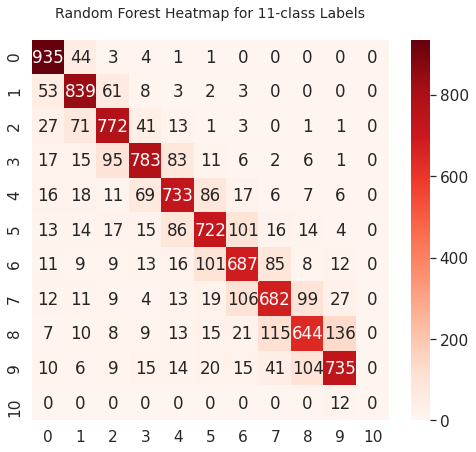

In [ ]:
plt.figure(figsize=[8, 7])
sns.heatmap(cm2, cmap='Reds', annot=True, fmt='.0f')
plt.title('Random Forest Heatmap for 11-class Labels\n', fontsize=14)
plt.show()

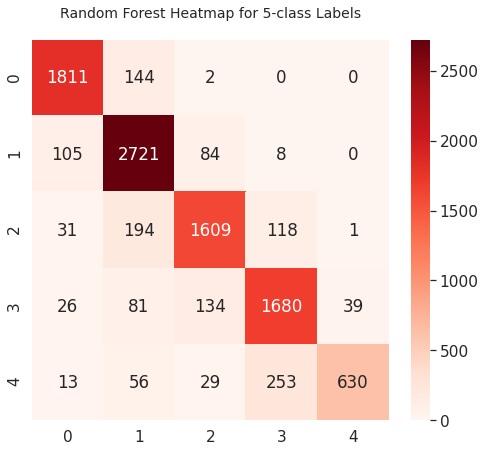

In [ ]:
# Heatmap 그려보기

plt.figure(figsize=[8,7])
sns.heatmap(cm3, cmap="Reds", annot=True, fmt='.0f')
plt.title('Random Forest Heatmap for 5-class Labels\n', fontsize=14)
plt.show()

In [ ]:
## Accruacy Evaluation
precise_accuracy =  np.sum(y_pred==y_test) / len(y_pred) # exact_match
adjacent_accuracy =  np.sum(np.abs(y_pred - y_test) <=1) / len(y_pred)

print('precise accuracy: {0:0.4f}'. format(precise_accuracy))
print('adjacent accuracy: {0:0.4f}'. format(adjacent_accuracy))

precise accuracy: 0.8651
adjacent accuracy: 0.9747


In [ ]:
## 2가지 Accruacy 스코어의 비교
print('Random Forest precise  accuracy for 5 labels: {0:0.4f}'. format(precise_accuracy))
print('Random Forest adjacent accuracy for 5 labels: {0:0.4f}'. format(adjacent_accuracy))
print('\n')
print(classification_report(y_test, y_pred))

Random Forest precise  accuracy for 5 labels: 0.8651
Random Forest adjacent accuracy for 5 labels: 0.9747


              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1957
           1       0.85      0.93      0.89      2918
           2       0.87      0.82      0.84      1953
           3       0.82      0.86      0.84      1960
           4       0.94      0.64      0.76       981

    accuracy                           0.87      9769
   macro avg       0.88      0.84      0.85      9769
weighted avg       0.87      0.87      0.86      9769



### 문제 38. 변경한 클래스를 이용한 Ligth GBM 다중분류 모델의 개선결과 확인하기

In [ ]:
lgbm =  LGBMClassifier(random_state=0)
lgbm.fit(x_train, y_train)
y_pred1 =  lgbm.predict(x_test)

lgbm_score1 = accuracy_score(y_test, y_pred1 )
print('LGBM Model accuracy score : {0:0.4f}'.format(lgbm_score1))

LGBM Model accuracy score : 0.9023


In [ ]:
## Confusion Matrix 구하기

cm4 =  confusion_matrix(y_test, y_pred1)
print('LGBM Confusion Matrix for 5-class Labels\n')
print(cm4)

LGBM Confusion Matrix for 5-class Labels

[[1859   91    3    4    0]
 [  77 2770   60    9    2]
 [  28  145 1685   91    4]
 [  26   60  104 1717   53]
 [  13   38   20  126  784]]


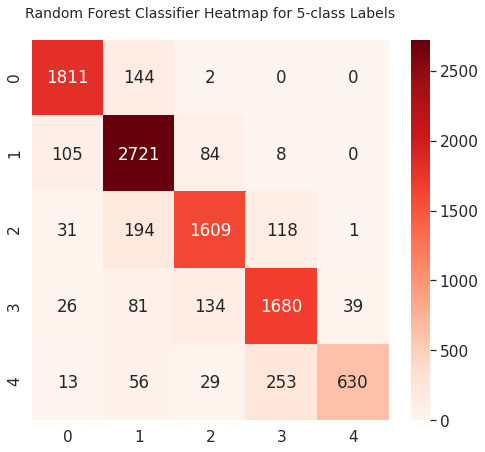

In [ ]:
# seaborn를 이용한 heatmap

plt.figure(figsize=[8, 7])
sns.heatmap(cm3, cmap='Reds', annot=True, fmt='.0f')
plt.title('Random Forest Classifier Heatmap for 5-class Labels\n', fontsize=14)
plt.show()

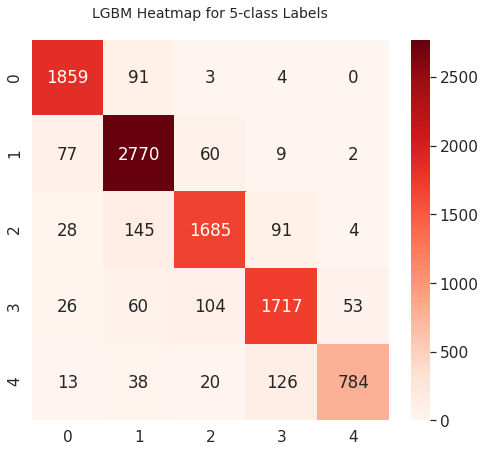

In [ ]:
# seaborn를 이용한 heatmap

plt.figure(figsize=[8, 7])
sns.heatmap(cm4, cmap='Reds', annot=True, fmt='.0f')
plt.title('LGBM Heatmap for 5-class Labels\n', fontsize=14)
plt.show()

In [ ]:
## Accuracy Evalaution
precise_accuracy1 =  np.sum(y_pred1 == y_test) / len(y_pred1) # exact_match
adjacent_accuracy1 =  np.sum(np.abs(y_pred1 - y_test) <= 1) / len(y_pred1) 

print('LGBM precise  accuracy for 5 labels: {0:0.4f}'. format(precise_accuracy1))
print('LGBM adjacent accuracy for 5 labels: {0:0.4f}'. format(adjacent_accuracy1))
print('\n')
print(classification_report(y_test, y_pred1))

LGBM precise  accuracy for 5 labels: 0.9023
LGBM adjacent accuracy for 5 labels: 0.9788


              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1957
           1       0.89      0.95      0.92      2918
           2       0.90      0.86      0.88      1953
           3       0.88      0.88      0.88      1960
           4       0.93      0.80      0.86       981

    accuracy                           0.90      9769
   macro avg       0.91      0.89      0.90      9769
weighted avg       0.90      0.90      0.90      9769



### 문제 39. 요약: 소득 다중분류 예측모델의 결과 비교하기

In [ ]:
print ('Accuracy Comparisons for Multiclass Models\n')
print ('rfc_score  (11 labels)  :', '{0:0.5f}'.format(rfc_score)) # Step 6, 문제 30
print ('rfc_score  ( 5 labels)  :', '{0:0.5f}'.format(precise_accuracy)) # Step 7, 문제 32
print ('lbgm_score (11 labels)  :', '{0:0.5f}'.format(lgbm_score)) # Step 6, 문제 29
print ('lgbm_score ( 5 labels)  :', '{0:0.5f}'.format(precise_accuracy1)) # Step 7, 문제 38

Accuracy Comparisons for Multiclass Models

rfc_score  (11 labels)  : 0.77101
rfc_score  ( 5 labels)  : 0.86508
lbgm_score (11 labels)  : 0.81185
lgbm_score ( 5 labels)  : 0.90234


In [ ]:
print('LGBM Confusion Matrix')
print(cm1) # Step 6, 문제 29
print('\n')
print('Random Forest Confusion Matrix')
print(cm2) # Step 7, 문제 33

LGBM Confusion Matrix
[[934  41   4   3   1   0   2   3   0   0   0]
 [ 40 869  46  13   1   0   0   0   0   0   0]
 [ 23  42 807  45   7   0   2   2   0   2   0]
 [ 13  20  75 838  62   6   2   2   1   0   0]
 [ 11  17  16  73 758  70  12   4   5   3   0]
 [  8  13  18  22  76 758  78  12  11   6   0]
 [ 10   7  11  12  11  92 702  78  13  15   0]
 [ 12   8  10   8  11  12  77 730  91  23   0]
 [  7  10  10   6   9   7  12 102 727  88   0]
 [  8   7  10  16  16   6   7  29  62 808   0]
 [  0   0   0   0   0   0   0   0   0  12   0]]


Random Forest Confusion Matrix
[[935  44   3   4   1   1   0   0   0   0   0]
 [ 53 839  61   8   3   2   3   0   0   0   0]
 [ 27  71 772  41  13   1   3   0   1   1   0]
 [ 17  15  95 783  83  11   6   2   6   1   0]
 [ 16  18  11  69 733  86  17   6   7   6   0]
 [ 13  14  17  15  86 722 101  16  14   4   0]
 [ 11   9   9  13  16 101 687  85   8  12   0]
 [ 12  11   9   4  13  19 106 682  99  27   0]
 [  7  10   8   9  13  15  21 115 644 136   0]
 [ 1

In [ ]:
print ('Classification Comparions for Multiclass Models\n')
print ('rfc_score   :', '{0:0.4f}'.format(rfc_score))
print (classification_report(y_test, y_pred)) # Step 7, 문제 37
print ('lgbm_score  :', '{0:0.4f}'.format(lgbm_score))
print (classification_report(y_test, y_pred1))

Classification Comparions for Multiclass Models

rfc_score   : 0.7710
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1957
           1       0.85      0.93      0.89      2918
           2       0.87      0.82      0.84      1953
           3       0.82      0.86      0.84      1960
           4       0.94      0.64      0.76       981

    accuracy                           0.87      9769
   macro avg       0.88      0.84      0.85      9769
weighted avg       0.87      0.87      0.86      9769

lgbm_score  : 0.8119
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1957
           1       0.89      0.95      0.92      2918
           2       0.90      0.86      0.88      1953
           3       0.88      0.88      0.88      1960
           4       0.93      0.80      0.86       981

    accuracy                           0.90      9769
   macro avg       0.91      0.89      0

## Step 8. 요약

- 1) 이진분류·다중분류 모델의 이해<p>: 분류 항목의 수에 따라 달라지는 모델링 방법(파라미터 처리)

- 2) 선형 기반·트리 기반 분류모델의 이해<p>: Logistic Regression, Random Forest, Gradient Boosting, <strong>Light GBM</strong> 등


- 3) 변수 처리 방법에 대한 이해<p>: 범주변수 처리, 스케일 조정, 3개 이상의 클래스 처리


- 4) 분류모델 결과를 해석하는 방법 습득<p>: 단순정확도, <b>인접정확도</b>, Precision, Recall  등


- 5) 평가결과를 바탕으로 모델을 개선하는 방법 습득<p>: F1 스코어, Confusion Matrix, Classification Report 등을 종합적으로 이용
    

- 다음 주제: 구현한 머신러닝 모델을 XAI 기법으로 설명하기